# Storing the processed  listing and review dataset into a dataframe

In [245]:
import pandas as pd

listing_amsterdam_price_df = pd.read_csv("/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_listing_price_amsterdam.csv")
listing_amsterdam_df = pd.read_csv("/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_listing_amsterdam.csv")
listing_amsterdam_review_score_df = pd.read_csv("/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_listing__review_score_amsterdam.csv")

print(listing_amsterdam_price_df.shape)
print(listing_amsterdam_df.shape)
print(listing_amsterdam_review_score_df.shape)

(5869, 61)
(9659, 61)
(8632, 61)


In [246]:
import pandas as pd

review_amsterdam_df = pd.read_csv("/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_review_amsterdam.csv")
print(review_amsterdam_df.shape)

(482042, 5)


# Task 1 - Numerical Analysis for features like - price, minimum nights, maximum nights, number of rating and review_score_rating

In [247]:
# List of Features

feature_one = ['price']
feature_two = ['minimum_nights','maximum_nights','number_of_reviews']
feature_three = ['review_scores_rating']

# Calculate summary statistics
summary_stats_one = listing_amsterdam_price_df[feature_one].describe()
summary_stats_two = listing_amsterdam_df[feature_two].describe()
summary_stats_three = listing_amsterdam_review_score_df[feature_three].describe()

# Display summary statistics
print(summary_stats_one)
print(summary_stats_two)
print(summary_stats_three)

              price
count   5869.000000
mean     289.639121
std     1216.784725
min       11.000000
25%      164.000000
50%      225.000000
75%      321.000000
max    91466.000000
       minimum_nights  maximum_nights  number_of_reviews
count     9659.000000     9659.000000        9659.000000
mean         4.215343      320.719433          45.636919
std         19.845051      417.469795         118.572029
min          1.000000        1.000000           0.000000
25%          2.000000       20.000000           3.000000
50%          3.000000       31.000000          10.000000
75%          4.000000      365.000000          32.000000
max       1001.000000     1125.000000        4130.000000
       review_scores_rating
count           8632.000000
mean               4.839924
std                0.256842
min                1.000000
25%                4.780000
50%                4.920000
75%                5.000000
max                5.000000


In [248]:
print(listing_amsterdam_price_df['price'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 5869 entries, 0 to 5868
Series name: price
Non-Null Count  Dtype  
--------------  -----  
5869 non-null   float64
dtypes: float64(1)
memory usage: 46.0 KB
None


# Task 1 - Analyzing the distribution of the price data by calculating the variance

# Task 6 - Detecting Outliers using the IQR technique

In [249]:
# Variance
variance_one = listing_amsterdam_price_df[feature_one].var()

# Interquartile Range (IQR)
Q1 = listing_amsterdam_price_df[feature_one].quantile(0.25)
Q3 = listing_amsterdam_price_df[feature_one].quantile(0.75)
IQR = Q3 - Q1

print("Variance - Price:\n", variance_one)
print("IQR:\n", IQR)
print("*********************************************")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower bound:",lower_bound)
print("upper bound:",upper_bound)

print("*********************************************")

outliers_listing_amsterdam_price_df = listing_amsterdam_price_df[listing_amsterdam_price_df['price'] > 556]


Variance - Price:
 price    1.480565e+06
dtype: float64
IQR:
 price    157.0
dtype: float64
*********************************************
lower bound: price   -71.5
dtype: float64
upper bound: price    556.5
dtype: float64
*********************************************


# Visualizing the outliers by plotting the outliers on a box plot

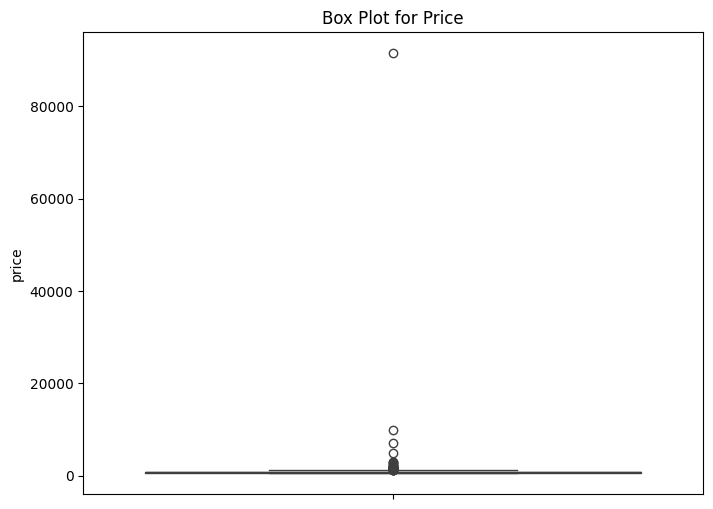

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the price column
plt.figure(figsize=(8, 6))
sns.boxplot(y=outliers_listing_amsterdam_price_df['price'])
plt.title('Box Plot for Price')
plt.show()

# Using the zscore technique to detect outliers

In [251]:
from scipy import stats

# Calculate Z-scores for the price column
outliers_listing_amsterdam_price_df['price_zscore'] = stats.zscore(outliers_listing_amsterdam_price_df['price'])

# Identify outliers based on Z-scores
price_outliers_z = outliers_listing_amsterdam_price_df[(outliers_listing_amsterdam_price_df['price_zscore'] > 3) | (outliers_listing_amsterdam_price_df['price_zscore'] < -3)]

# Display the outliers
price_outliers_z[['price', 'price_zscore']]

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/3968015130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_listing_amsterdam_price_df['price_zscore'] = stats.zscore(outliers_listing_amsterdam_price_df['price'])


,price,price_zscore
1670,91466.0,17.609832


# Task 1 - Analyzing the distribution of the minimum nights, maximum nights and number of reviews data by calculating the variance

# Task 6 - Detecting Outliers using the IQR technique

In [252]:
variance_two = listing_amsterdam_df[feature_two].var()

Q1 = listing_amsterdam_df[feature_two].quantile(0.25)
Q3 = listing_amsterdam_df[feature_two].quantile(0.75)
IQR = Q3 - Q1

print("Variance - Min, Max Nights and Review Score:\n", variance_two)
print("IQR:\n", IQR)
print("*********************************************")

lower_bound = Q1 - 1.5 * IQR[0]
upper_bound = Q3 + 1.5 * IQR[0]

print("lower bound:",lower_bound)
print("upper bound:",upper_bound)

print("*********************************************")

outliers_listing_amsterdam_minimimum_nights_df = listing_amsterdam_df[listing_amsterdam_df['minimum_nights'] > 7]

Variance - Min, Max Nights and Review Score:
 minimum_nights          393.826060
maximum_nights       174281.029785
number_of_reviews     14059.326121
dtype: float64
IQR:
 minimum_nights         2.0
maximum_nights       345.0
number_of_reviews     29.0
dtype: float64
*********************************************
lower bound: minimum_nights       -1.0
maximum_nights       17.0
number_of_reviews     0.0
Name: 0.25, dtype: float64
upper bound: minimum_nights         7.0
maximum_nights       368.0
number_of_reviews     35.0
Name: 0.75, dtype: float64
*********************************************


/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/1594586214.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower_bound = Q1 - 1.5 * IQR[0]
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/1594586214.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  upper_bound = Q3 + 1.5 * IQR[0]


# Visualizing the outliers by plotting the outliers on a box plot

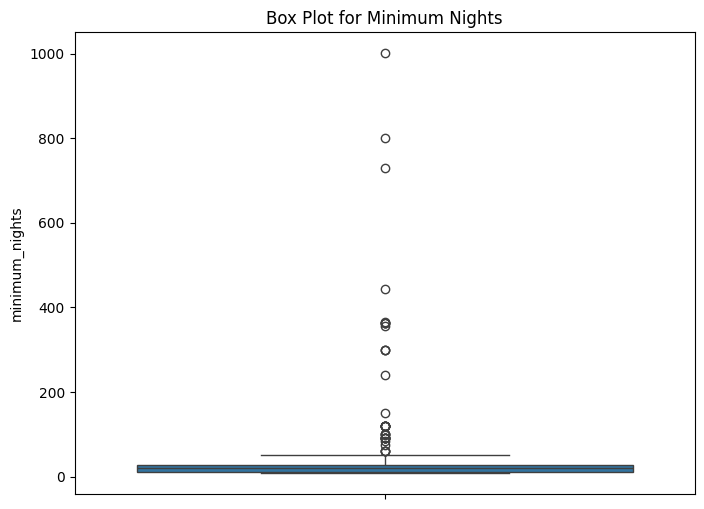

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the price column
plt.figure(figsize=(8, 6))
sns.boxplot(y=outliers_listing_amsterdam_minimimum_nights_df['minimum_nights'])
plt.title('Box Plot for Minimum Nights')
plt.show()

# Using the zscore technique to detect outliers

In [254]:
from scipy import stats

# Calculate Z-scores for the price column
outliers_listing_amsterdam_minimimum_nights_df['min_nights_zscore'] = stats.zscore(outliers_listing_amsterdam_minimimum_nights_df['minimum_nights'])

# Identify outliers based on Z-scores
min_nights_outliers_z = outliers_listing_amsterdam_minimimum_nights_df[(outliers_listing_amsterdam_minimimum_nights_df['min_nights_zscore'] > 3) | (outliers_listing_amsterdam_minimimum_nights_df['min_nights_zscore'] < -3)]

# Display the outliers
min_nights_outliers_z[['minimum_nights', 'min_nights_zscore']]

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/434447469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_listing_amsterdam_minimimum_nights_df['min_nights_zscore'] = stats.zscore(outliers_listing_amsterdam_minimimum_nights_df['minimum_nights'])


,minimum_nights,min_nights_zscore
334,364,3.486986
1389,363,3.476235
2351,800,8.174286
2783,444,4.347041
3024,364,3.486986
3536,363,3.476235
3904,365,3.497737
4094,356,3.400980
5091,1001,10.335175
8466,729,7.410987


# Task 1 - Analyzing the distribution of the review score rating data by calculating the variance

# Task 6 - Detecting Outliers using the IQR technique

In [255]:
variance_three = listing_amsterdam_review_score_df[feature_three].var()

Q1 = listing_amsterdam_review_score_df[feature_three].quantile(0.25)
Q3 = listing_amsterdam_review_score_df[feature_three].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower bound:",lower_bound)
print("upper bound:",upper_bound)

print("*********************************************")

outliers_listing_amsterdam_review_score_df = listing_amsterdam_review_score_df[listing_amsterdam_review_score_df['review_scores_rating'] < 4.45]

lower bound: review_scores_rating    4.45
dtype: float64
upper bound: review_scores_rating    5.33
dtype: float64
*********************************************


# Visualizing the outliers by plotting the outliers on a box plot

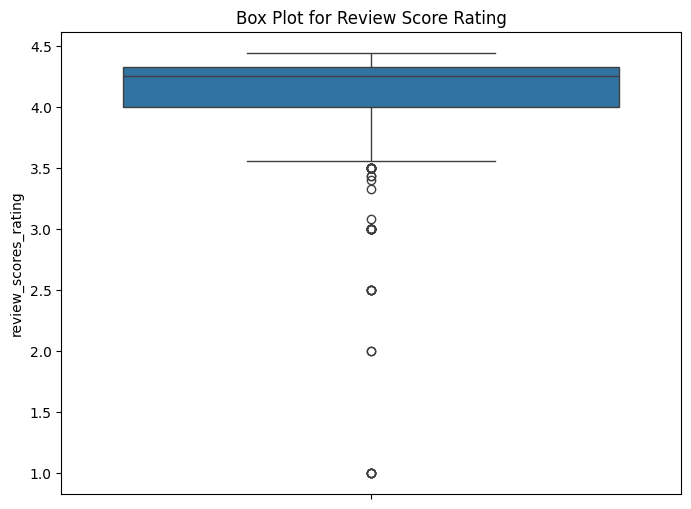

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the price column
plt.figure(figsize=(8, 6))
sns.boxplot(y=outliers_listing_amsterdam_review_score_df['review_scores_rating'])
plt.title('Box Plot for Review Score Rating')
plt.show()

# Using the zscore technique to detect outliers

In [257]:
from scipy import stats

# Calculate Z-scores for the price column
outliers_listing_amsterdam_review_score_df['review_score_zscore'] = stats.zscore(outliers_listing_amsterdam_review_score_df['review_scores_rating'])

# Identify outliers based on Z-scores
review_score_outliers_z = outliers_listing_amsterdam_review_score_df[(outliers_listing_amsterdam_review_score_df['review_score_zscore'] > 3) | (outliers_listing_amsterdam_review_score_df['review_score_zscore'] < -3)]

# Display the outliers
review_score_outliers_z[['review_scores_rating', 'review_score_zscore']]

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/4079631151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_listing_amsterdam_review_score_df['review_score_zscore'] = stats.zscore(outliers_listing_amsterdam_review_score_df['review_scores_rating'])


,review_scores_rating,review_score_zscore
156,1.0,-6.175529
952,2.5,-3.156069
1753,2.5,-3.156069
3580,2.5,-3.156069
3889,1.0,-6.175529
4960,2.0,-4.162556
5479,1.0,-6.175529
6397,2.0,-4.162556
6429,1.0,-6.175529
6801,1.0,-6.175529


# Task 2 - Part A: Creating a histogram using the output obtained 

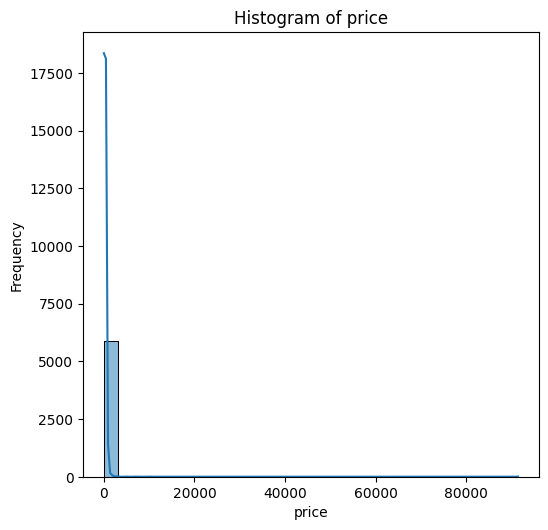

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and features is your list of features
# features = ['price', 'minimum_nights', 'number_of_reviews']

# Plot histograms
plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_one):
    plt.subplot(2, 3, i+1)
    sns.histplot(listing_amsterdam_price_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

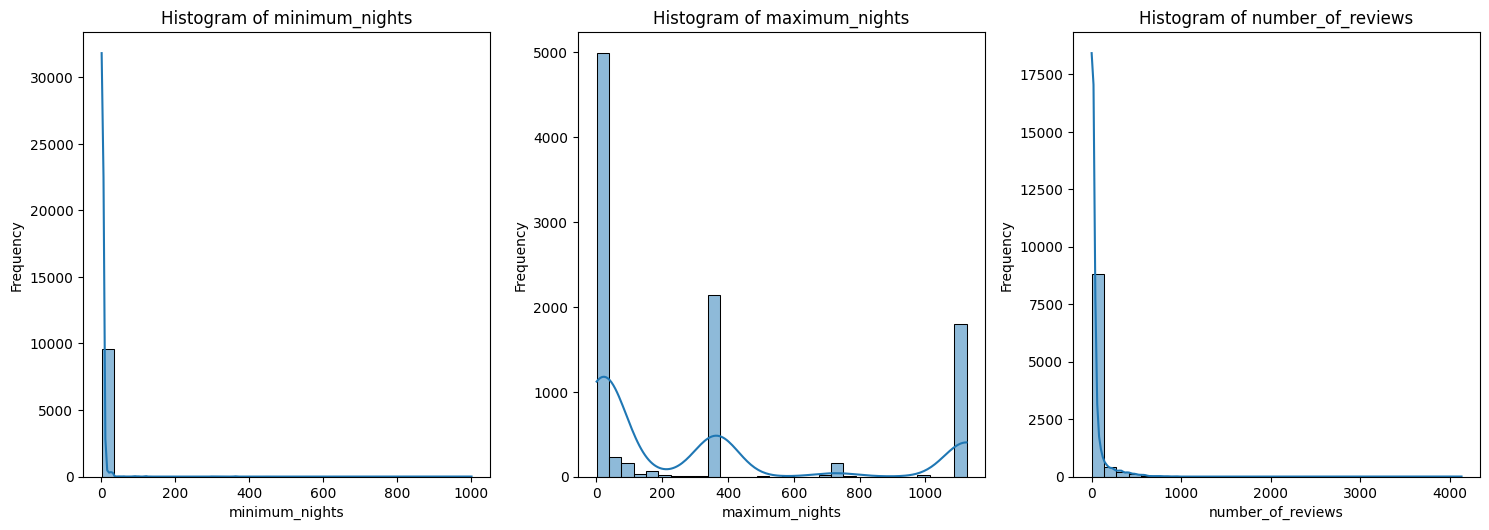

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and features is your list of features
# features = ['price', 'minimum_nights', 'number_of_reviews']

# Plot histograms
plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_two):
    plt.subplot(2, 3, i+1)
    sns.histplot(listing_amsterdam_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

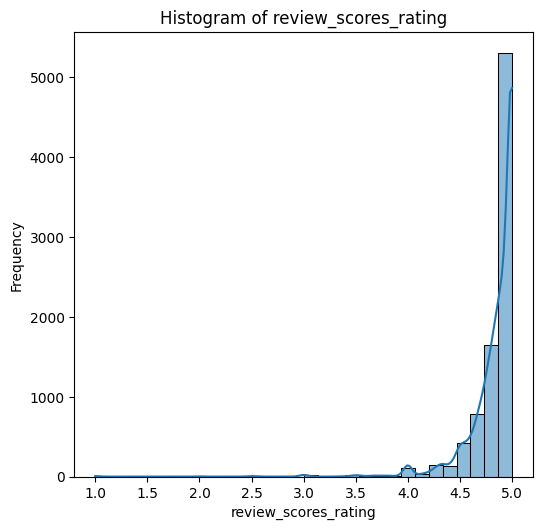

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and features is your list of features
# features = ['price', 'minimum_nights', 'number_of_reviews']

# Plot histograms
plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_three):
    plt.subplot(2, 3, i+1)
    sns.histplot(listing_amsterdam_review_score_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Task 2 - Part B: Using Density Plots to visualize the data distribution 

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/4119598371.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listing_amsterdam_price_df[feature_one], shade=True, color='blue')


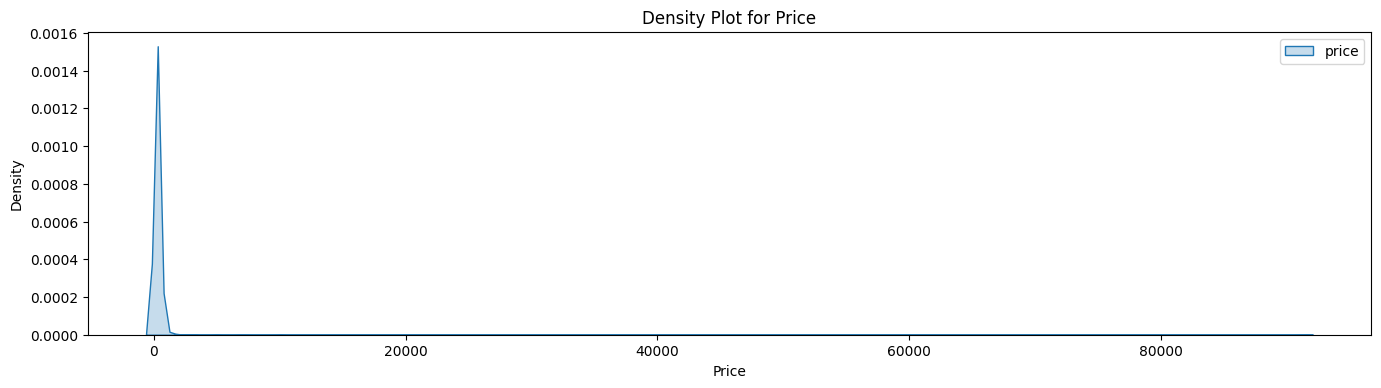

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for better visualization
plt.figure(figsize=(14, 18))

# Plot KDE for 'price'
plt.subplot(5, 1, 1)  # 3 rows, 1 column, 1st plot
sns.kdeplot(listing_amsterdam_price_df[feature_one], shade=True, color='blue')
plt.title('Density Plot for Price')
plt.xlabel('Price')

# Adjust the spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/1071990431.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listing_amsterdam_df['minimum_nights'], shade=True, color='green')
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/1071990431.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listing_amsterdam_df['maximum_nights'], shade=True, color='purple')
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/1071990431.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listing_amsterdam_df['number_of_reviews'], shade=True, color='yellow')


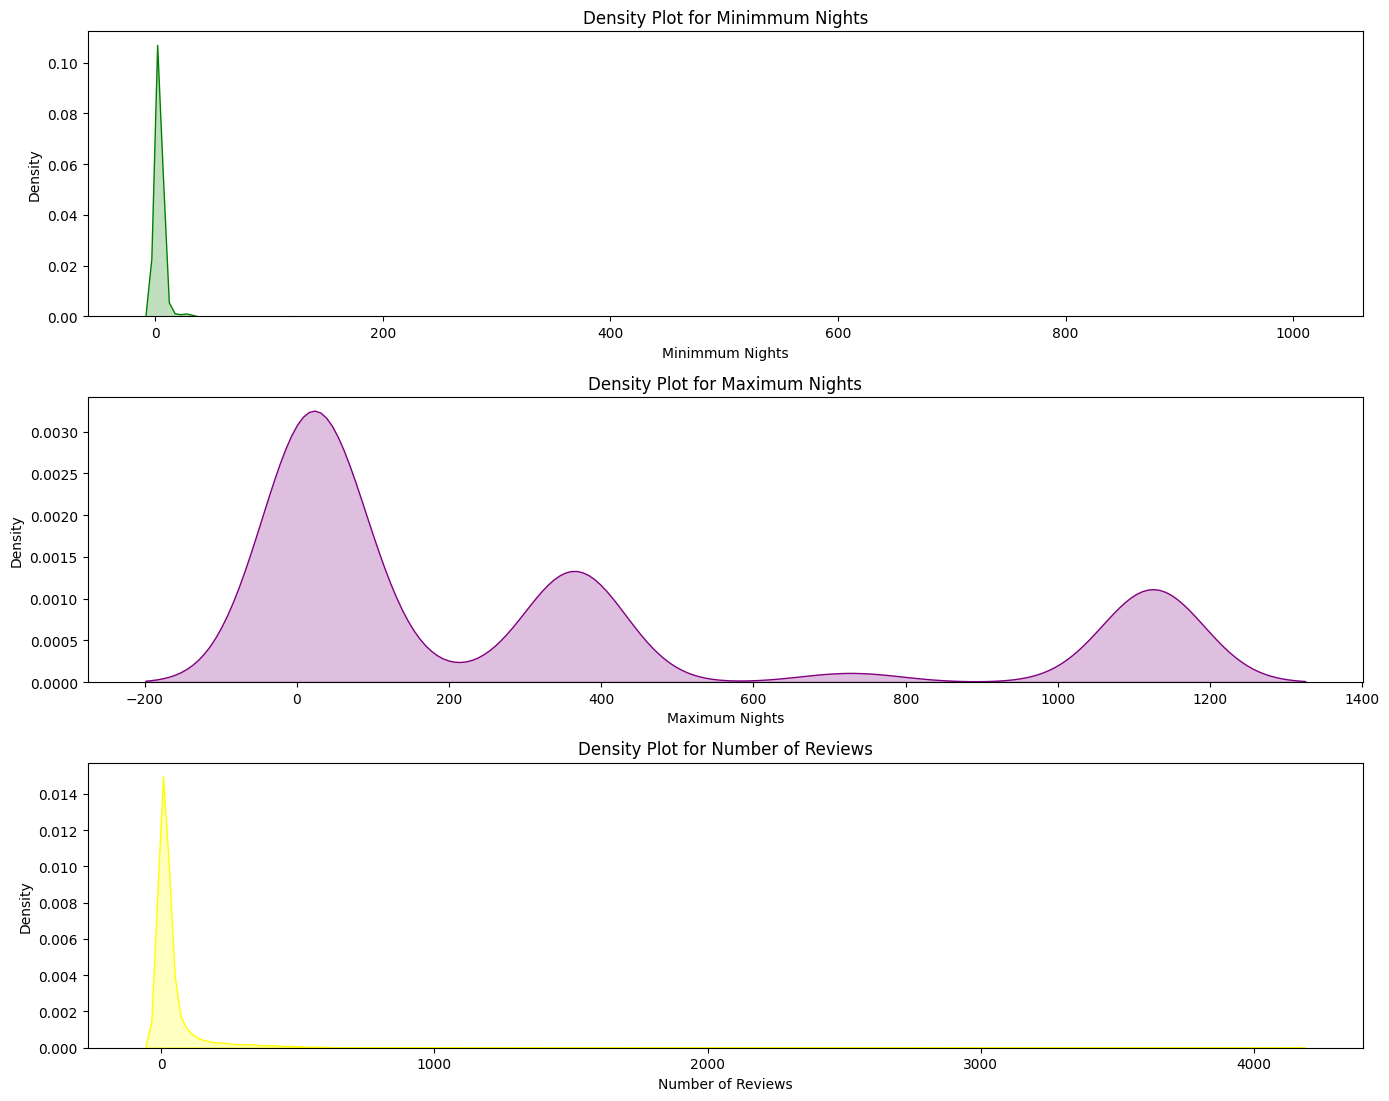

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for better visualization
plt.figure(figsize=(14, 18))

# Plot KDE for 'price'
plt.subplot(5, 1, 1)  # 3 rows, 1 column, 1st plot
sns.kdeplot(listing_amsterdam_df['minimum_nights'], shade=True, color='green')
plt.title('Density Plot for Minimmum Nights')
plt.xlabel('Minimmum Nights')

plt.subplot(5, 1, 2)  # 3 rows, 1 column, 1st plot
sns.kdeplot(listing_amsterdam_df['maximum_nights'], shade=True, color='purple')
plt.title('Density Plot for Maximum Nights')
plt.xlabel('Maximum Nights')

plt.subplot(5, 1, 3)  # 3 rows, 1 column, 1st plot
sns.kdeplot(listing_amsterdam_df['number_of_reviews'], shade=True, color='yellow')
plt.title('Density Plot for Number of Reviews')
plt.xlabel('Number of Reviews')

# Adjust the spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/4117898353.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listing_amsterdam_review_score_df[feature_three], shade=True, color='blue')


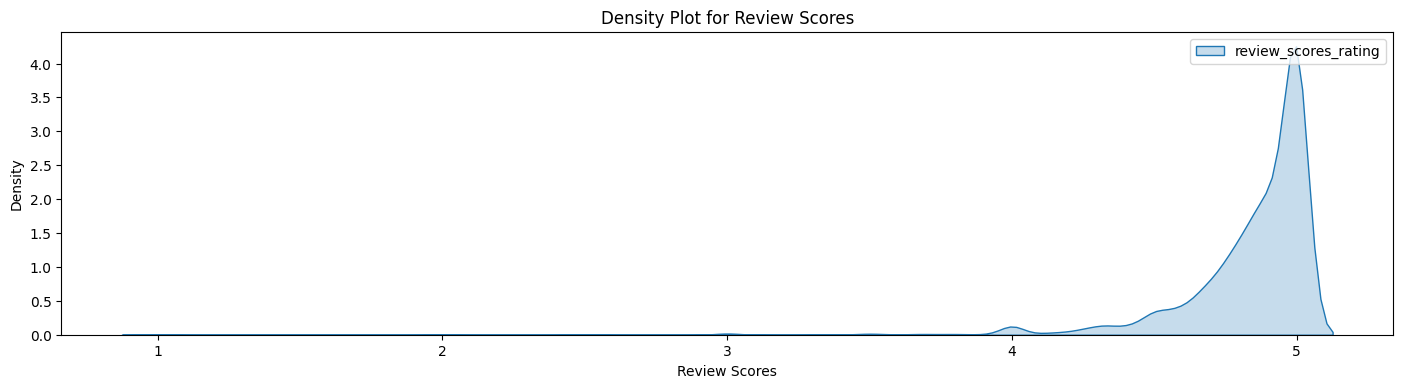

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for better visualization
plt.figure(figsize=(14, 18))

# Plot KDE for 'price'
plt.subplot(5, 1, 1)  # 3 rows, 1 column, 1st plot
sns.kdeplot(listing_amsterdam_review_score_df[feature_three], shade=True, color='blue')
plt.title('Density Plot for Review Scores')
plt.xlabel('Review Scores')

# Adjust the spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

# Printing the total of no. of rows and features in the listing and review dataset available for Amsterdam 

In [265]:
print(listing_amsterdam_price_df.shape)
print(listing_amsterdam_df.shape)
print(listing_amsterdam_review_score_df.shape)

(5869, 61)
(9659, 61)
(8632, 61)


# Getting more insights about outliers for price, minimum_nights and maximum_nights using binning technique

In [266]:
import pandas as pd

price_bins = [0,164,225,321,2000,10000]

listing_amsterdam_price_df['binned_price'] = pd.cut(listing_amsterdam_price_df['price'],price_bins)

price_bins_count = listing_amsterdam_price_df['binned_price'].value_counts()

print(price_bins_count)

binned_price
(0, 164]         1483
(164, 225]       1469
(225, 321]       1455
(321, 2000]      1453
(2000, 10000]       8
Name: count, dtype: int64


In [267]:
import pandas as pd

min_night_bins = [0,1,2,3,4,25,50,100,500,729,1001]

listing_amsterdam_df['binned_min_nights'] = pd.cut(listing_amsterdam_df['minimum_nights'],min_night_bins)

min_night_bin_count = listing_amsterdam_df['binned_min_nights'].value_counts()

print(min_night_bin_count)

binned_min_nights
(1, 2]         2774
(2, 3]         2655
(0, 1]         1718
(4, 25]        1370
(3, 4]         1010
(25, 50]         92
(100, 500]       20
(50, 100]        17
(729, 1001]       2
(500, 729]        1
Name: count, dtype: int64


In [268]:
import pandas as pd

max_night_bins = [0,1,20,31,365,500,750,1000,1125]

listing_amsterdam_df['binned_max_nights'] = pd.cut(listing_amsterdam_df['maximum_nights'],max_night_bins)

max_night_bin_count = listing_amsterdam_df['binned_max_nights'].value_counts()

print(max_night_bin_count)

binned_max_nights
(31, 365]       2734
(1, 20]         2505
(20, 31]        2405
(1000, 1125]    1809
(500, 750]       178
(0, 1]            21
(365, 500]         4
(750, 1000]        3
Name: count, dtype: int64


# Removing the outliers detected in the price column

In [269]:
filtered_listing_amsterdam_price_df = listing_amsterdam_price_df[listing_amsterdam_price_df['price'] < 2000]

print(filtered_listing_amsterdam_price_df.shape)

(5859, 62)


# Removing the outliers detected in the minimum_nights column

In [270]:
filtered_listing_amsterdam_df = listing_amsterdam_df[listing_amsterdam_df['minimum_nights'] < 25]

print(filtered_listing_amsterdam_df.shape)

(9517, 63)


# Repeating Task 1 - Numerical Analysis for features like - price, minimum nights, maximum nights, number of rating and review_score_rating

In [271]:
# List of Features

feature_one = ['price']
feature_two = ['minimum_nights','maximum_nights','number_of_reviews']
feature_three = ['review_scores_rating']

# Calculate summary statistics
summary_stats_one = filtered_listing_amsterdam_price_df[feature_one].describe()
summary_stats_two = filtered_listing_amsterdam_df[feature_two].describe()
summary_stats_three = listing_amsterdam_review_score_df[feature_three].describe()

# Display summary statistics
print(summary_stats_one)
print(summary_stats_two)
print(summary_stats_three)

             price
count  5859.000000
mean    268.124253
std     174.235118
min      11.000000
25%     163.000000
50%     225.000000
75%     320.000000
max    1995.000000
       minimum_nights  maximum_nights  number_of_reviews
count     9517.000000     9517.000000        9517.000000
mean         3.037407      319.842492          46.069665
std          2.316731      418.210542         119.319973
min          1.000000        1.000000           0.000000
25%          2.000000       20.000000           3.000000
50%          3.000000       30.000000          10.000000
75%          3.000000      365.000000          32.000000
max         24.000000     1125.000000        4130.000000
       review_scores_rating
count           8632.000000
mean               4.839924
std                0.256842
min                1.000000
25%                4.780000
50%                4.920000
75%                5.000000
max                5.000000


# Analyzing the distribution of the filtered data by calculating the variance

In [273]:
# Variance
variance_one = filtered_listing_amsterdam_price_df[feature_one].var()
variance_two = filtered_listing_amsterdam_df[feature_two].var()
variance_three = listing_amsterdam_review_score_df[feature_three].var()

# Interquartile Range (IQR)
Q1 = filtered_listing_amsterdam_price_df[feature_one].quantile(0.25)
Q3 = filtered_listing_amsterdam_price_df[feature_one].quantile(0.75)
IQR = Q3 - Q1

print("Variance - Price:\n", variance_one)
print("IQR:\n", IQR)
print("*********************************************")

Q1 = filtered_listing_amsterdam_df[feature_two].quantile(0.25)
Q3 = filtered_listing_amsterdam_df[feature_two].quantile(0.75)
IQR = Q3 - Q1

print("Variance - Min, Max Nights and Review Score:\n", variance_two)
print("IQR:\n", IQR)
print("*********************************************")

Q1 = listing_amsterdam_review_score_df[feature_three].quantile(0.25)
Q3 = listing_amsterdam_review_score_df[feature_three].quantile(0.75)
IQR = Q3 - Q1

print("Variance - Review Score Rating:\n", variance_three)
print("IQR:\n", IQR)

Variance - Price:
 price    30357.87633
dtype: float64
IQR:
 price    157.0
dtype: float64
*********************************************
Variance - Min, Max Nights and Review Score:
 minimum_nights            5.367243
maximum_nights       174900.057051
number_of_reviews     14237.255865
dtype: float64
IQR:
 minimum_nights         1.0
maximum_nights       345.0
number_of_reviews     29.0
dtype: float64
*********************************************
Variance - Review Score Rating:
 review_scores_rating    0.065968
dtype: float64
IQR:
 review_scores_rating    0.22
dtype: float64


# Task 2 - Part A: Creating a histogram using the filtered output obtained 

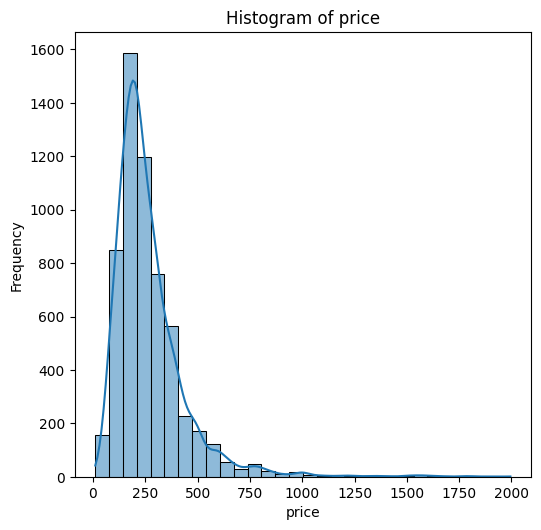

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and features is your list of features
# features = ['price', 'minimum_nights', 'number_of_reviews']

# Plot histograms
plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_one):
    plt.subplot(2, 3, i+1)
    sns.histplot(filtered_listing_amsterdam_price_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

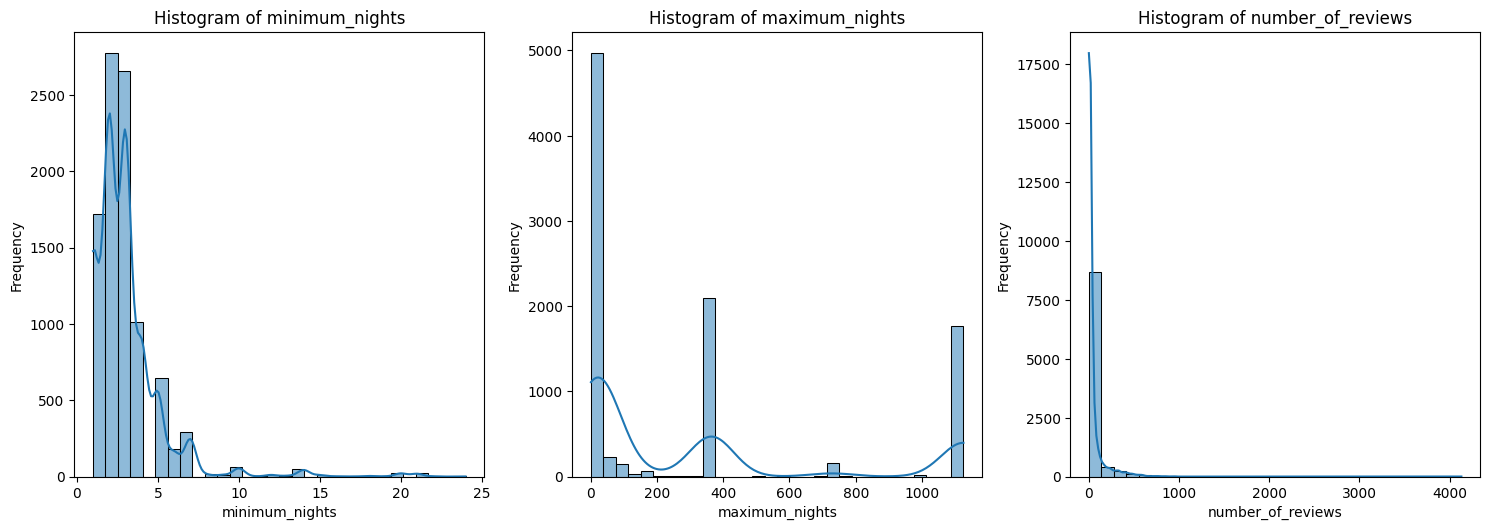

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and features is your list of features
# features = ['price', 'minimum_nights', 'number_of_reviews']

# Plot histograms
plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_two):
    plt.subplot(2, 3, i+1)
    sns.histplot(filtered_listing_amsterdam_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

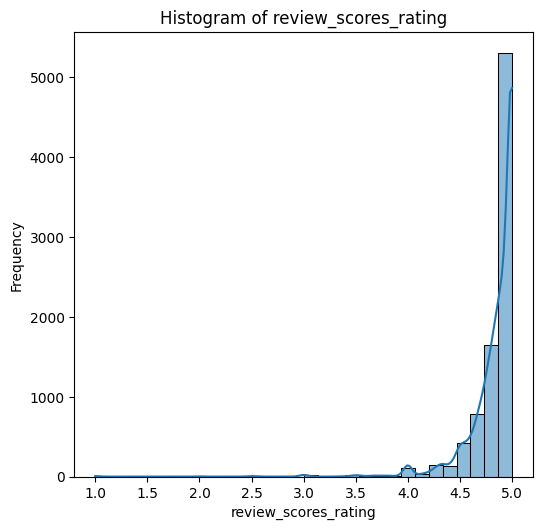

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and features is your list of features
# features = ['price', 'minimum_nights', 'number_of_reviews']

# Plot histograms
plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_three):
    plt.subplot(2, 3, i+1)
    sns.histplot(listing_amsterdam_review_score_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Task 2 - Part B: Using Density Plots to visualize the data distribution 

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/1873518540.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_listing_amsterdam_price_df[feature_one], shade=True, color='blue')


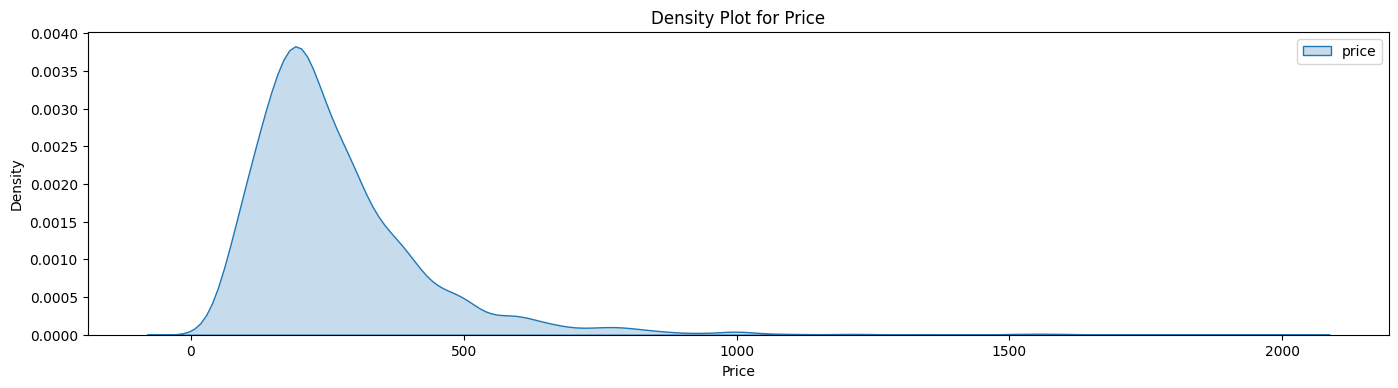

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for better visualization
plt.figure(figsize=(14, 18))

# Plot KDE for 'price'
plt.subplot(5, 1, 1)  # 3 rows, 1 column, 1st plot
sns.kdeplot(filtered_listing_amsterdam_price_df[feature_one], shade=True, color='blue')
plt.title('Density Plot for Price')
plt.xlabel('Price')

# Adjust the spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/1003857579.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_listing_amsterdam_price_df['minimum_nights'], shade=True, color='green')
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/1003857579.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_listing_amsterdam_price_df['maximum_nights'], shade=True, color='purple')
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/1003857579.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_listing_amsterdam_price_df['number_of_reviews'], shade=True, color='

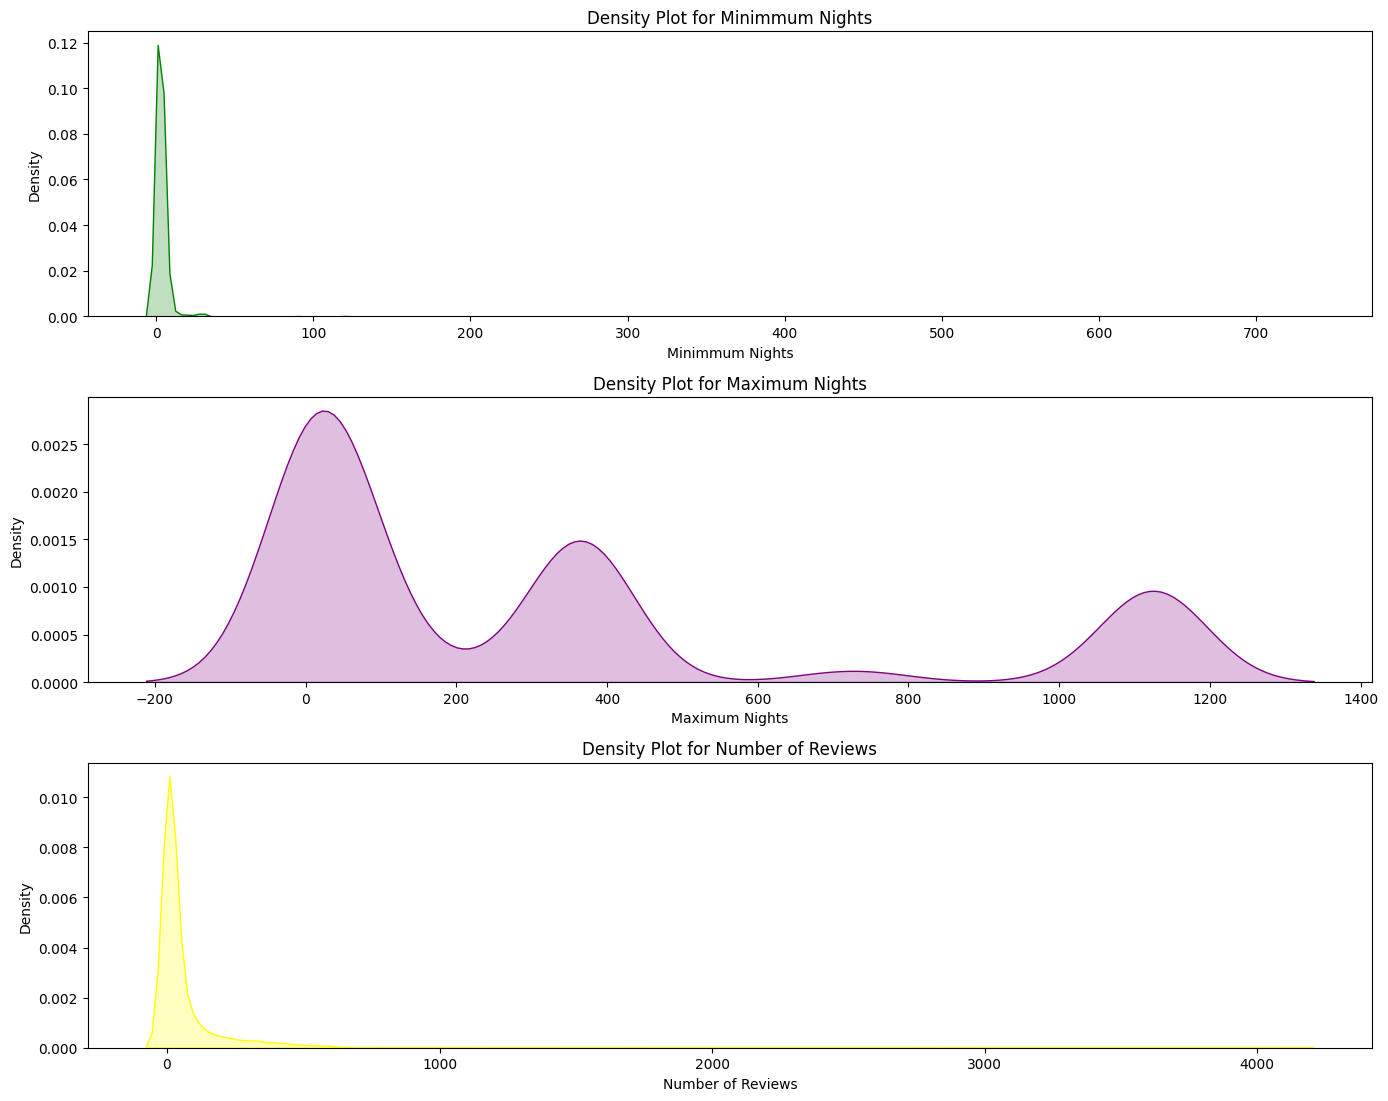

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for better visualization
plt.figure(figsize=(14, 18))

# Plot KDE for 'price'
plt.subplot(5, 1, 1)  # 3 rows, 1 column, 1st plot
sns.kdeplot(filtered_listing_amsterdam_price_df['minimum_nights'], shade=True, color='green')
plt.title('Density Plot for Minimmum Nights')
plt.xlabel('Minimmum Nights')

plt.subplot(5, 1, 2)  # 3 rows, 1 column, 1st plot
sns.kdeplot(filtered_listing_amsterdam_price_df['maximum_nights'], shade=True, color='purple')
plt.title('Density Plot for Maximum Nights')
plt.xlabel('Maximum Nights')

plt.subplot(5, 1, 3)  # 3 rows, 1 column, 1st plot
sns.kdeplot(filtered_listing_amsterdam_price_df['number_of_reviews'], shade=True, color='yellow')
plt.title('Density Plot for Number of Reviews')
plt.xlabel('Number of Reviews')

# Adjust the spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/4117898353.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listing_amsterdam_review_score_df[feature_three], shade=True, color='blue')


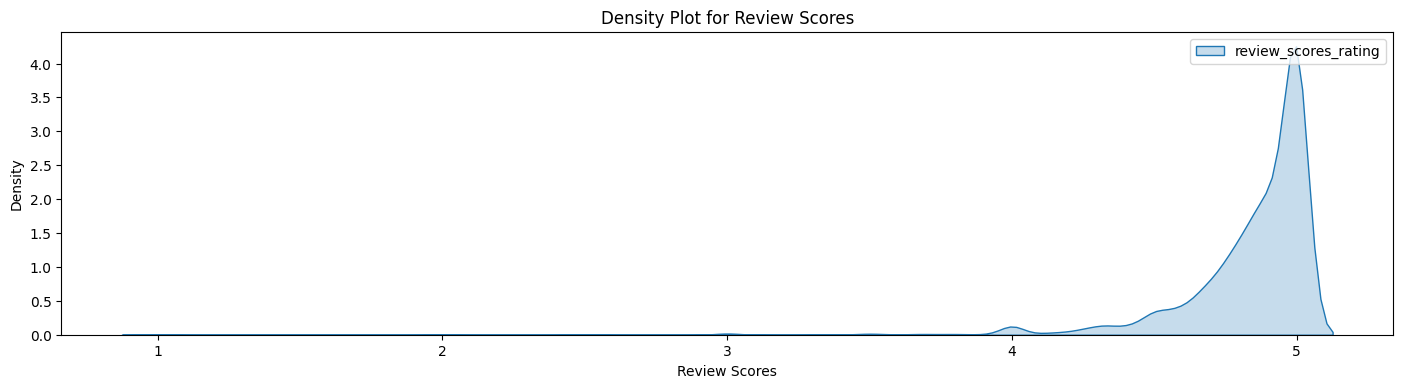

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for better visualization
plt.figure(figsize=(14, 18))

# Plot KDE for 'price'
plt.subplot(5, 1, 1)  # 3 rows, 1 column, 1st plot
sns.kdeplot(listing_amsterdam_review_score_df[feature_three], shade=True, color='blue')
plt.title('Density Plot for Review Scores')
plt.xlabel('Review Scores')

# Adjust the spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

# Task 3 - Conducting Correlation Analysis to explore the relationship between numerical variables such as price, number of reviews, availability_365, review score rating and visualizing the output on a scatter plot

                         price  number_of_reviews  availability_365  \
price                 1.000000          -0.195154          0.064080   
number_of_reviews    -0.195154           1.000000          0.103705   
availability_365      0.064080           0.103705          1.000000   
review_scores_rating  0.128049          -0.053283         -0.114819   

                      review_scores_rating  
price                             0.128049  
number_of_reviews                -0.053283  
availability_365                 -0.114819  
review_scores_rating              1.000000  


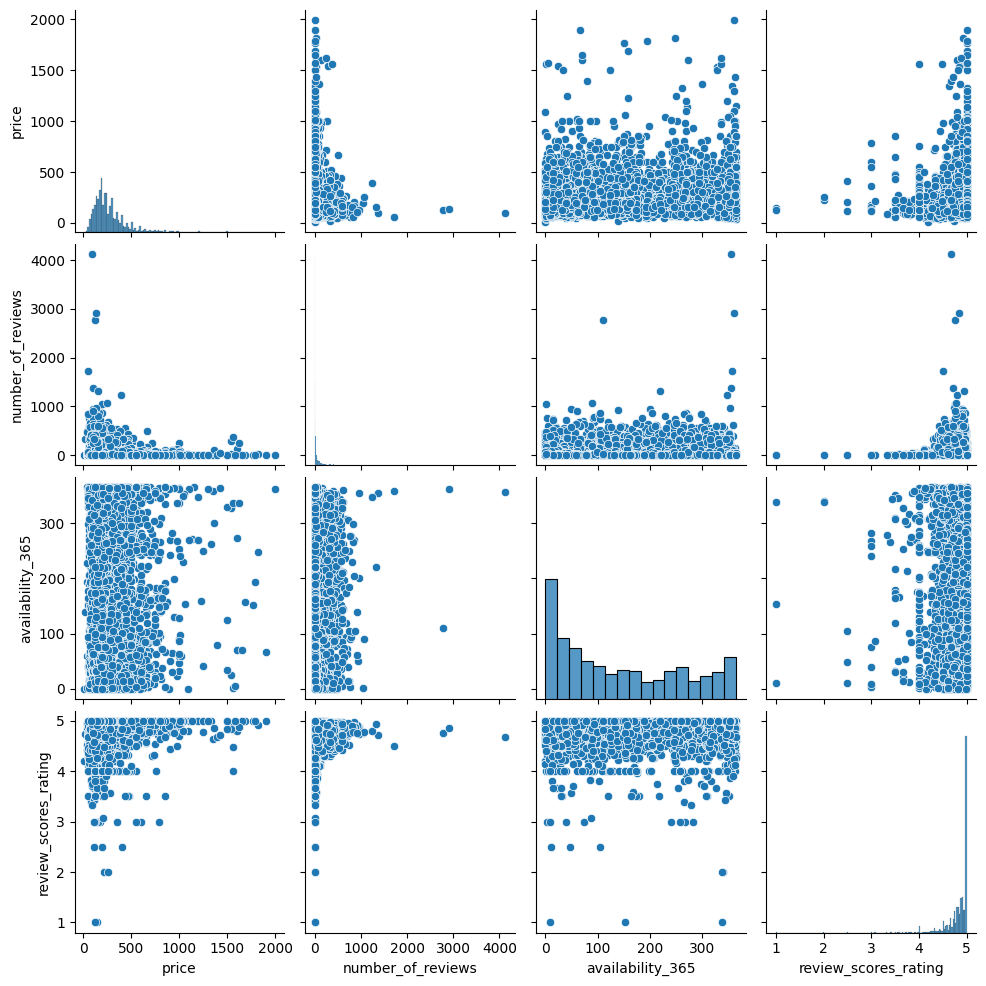

In [280]:
features = ['price','number_of_reviews','availability_365','review_scores_rating']

corr_matrix = filtered_listing_amsterdam_price_df[features].corr()

# Print the correlation matrix
print(corr_matrix)

sns.pairplot(filtered_listing_amsterdam_price_df[features])

# Display the plots
plt.show()

# Visualizing the results obtained during correlation analysis on a heat map 

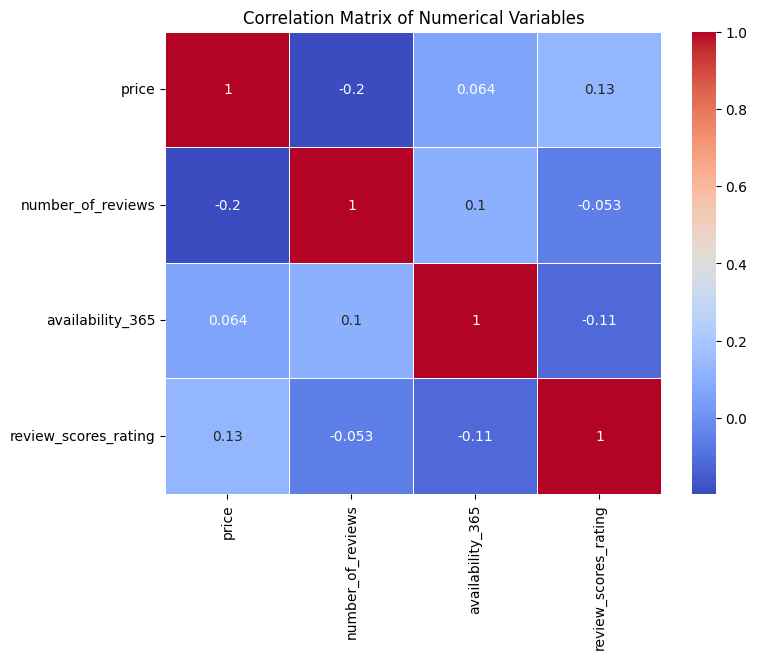

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


# Analyzed the data frame and inferred that fields like accomodates and bedrooms could provide better correlation metrics

In [282]:
print(filtered_listing_amsterdam_price_df['accommodates'].info())

<class 'pandas.core.series.Series'>
Index: 5859 entries, 0 to 5868
Series name: accommodates
Non-Null Count  Dtype
--------------  -----
5859 non-null   int64
dtypes: int64(1)
memory usage: 91.5 KB
None


In [283]:
print(filtered_listing_amsterdam_price_df['bedrooms'].info())

<class 'pandas.core.series.Series'>
Index: 5859 entries, 0 to 5868
Series name: bedrooms
Non-Null Count  Dtype  
--------------  -----  
5853 non-null   float64
dtypes: float64(1)
memory usage: 91.5 KB
None


                         price  accommodates  bedrooms  number_of_reviews  \
price                 1.000000      0.514691  0.510435          -0.195154   
accommodates          0.514691      1.000000  0.743782          -0.082850   
bedrooms              0.510435      0.743782  1.000000          -0.153221   
number_of_reviews    -0.195154     -0.082850 -0.153221           1.000000   
availability_365      0.064080     -0.008631 -0.080579           0.103705   
review_scores_rating  0.128049     -0.032446  0.059108          -0.053283   

                      availability_365  review_scores_rating  
price                         0.064080              0.128049  
accommodates                 -0.008631             -0.032446  
bedrooms                     -0.080579              0.059108  
number_of_reviews             0.103705             -0.053283  
availability_365              1.000000             -0.114819  
review_scores_rating         -0.114819              1.000000  


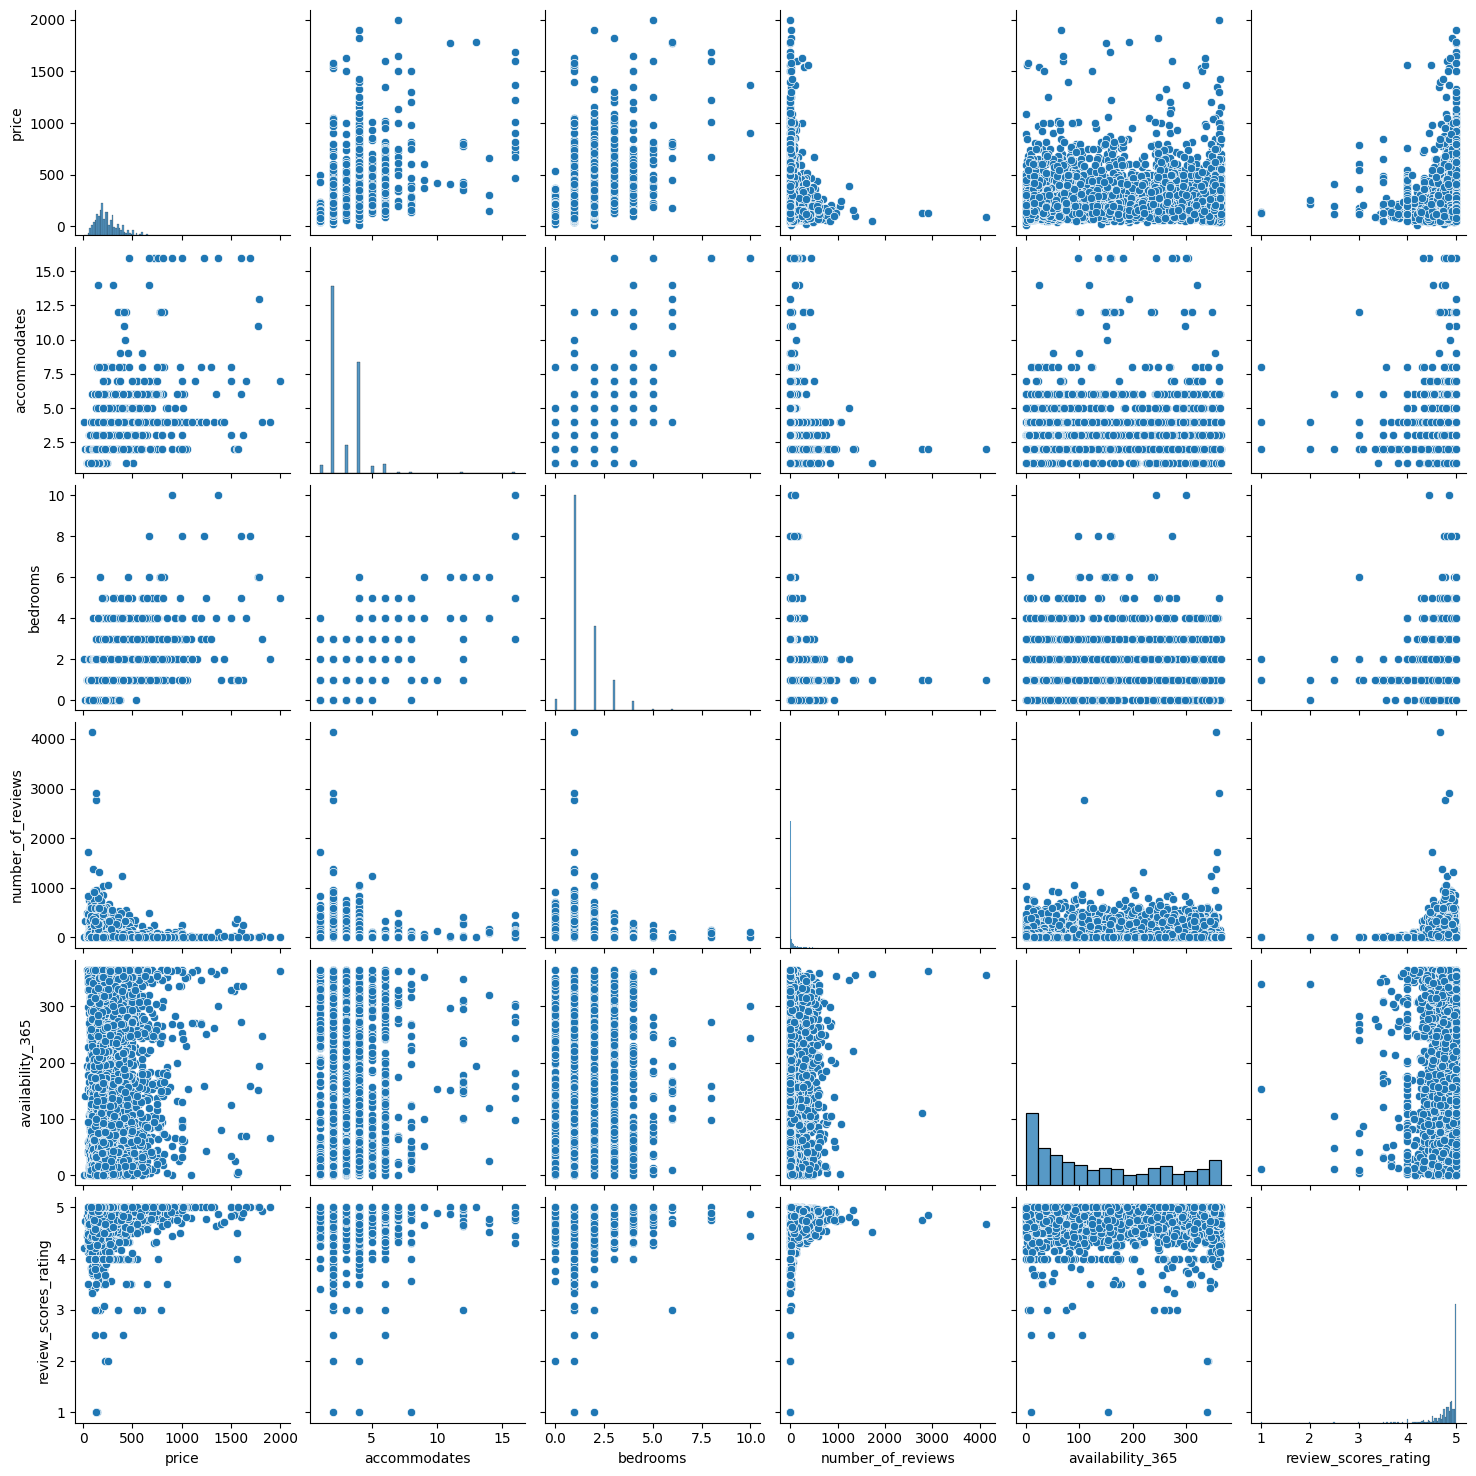

In [284]:
features = ['price','accommodates','bedrooms','number_of_reviews','availability_365','review_scores_rating']

corr_matrix_updated = filtered_listing_amsterdam_price_df[features].corr()

# Print the correlation matrix
print(corr_matrix_updated)

sns.pairplot(filtered_listing_amsterdam_price_df[features])

# Display the plots
plt.show()

# Visualizing the results obtained during correlation analysis on a heat map 

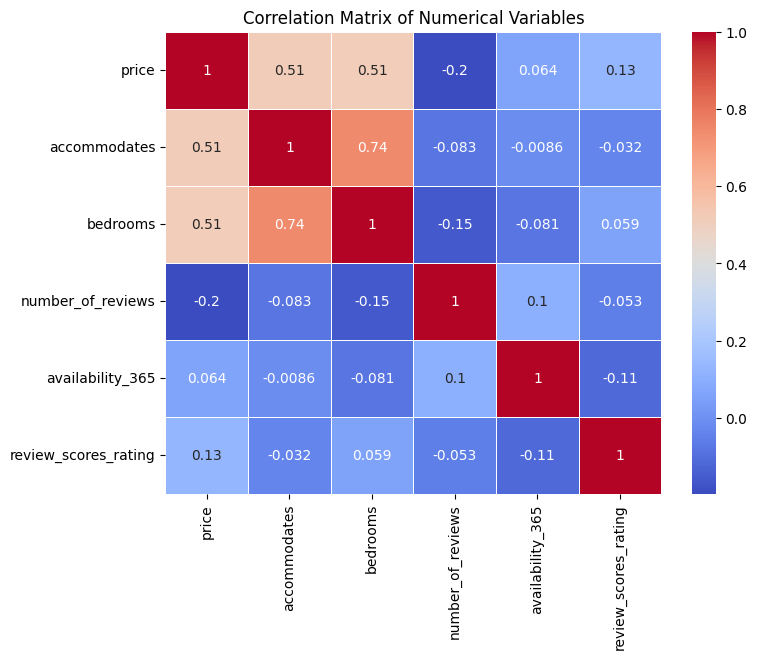

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_updated, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Task 4 - Analyzing neighorhood and room type features

In [286]:
print(filtered_listing_amsterdam_price_df['room_type'].info())

<class 'pandas.core.series.Series'>
Index: 5859 entries, 0 to 5868
Series name: room_type
Non-Null Count  Dtype 
--------------  ----- 
5859 non-null   object
dtypes: object(1)
memory usage: 91.5+ KB
None


In [287]:
print(filtered_listing_amsterdam_price_df['host_neighbourhood'].info())

<class 'pandas.core.series.Series'>
Index: 5859 entries, 0 to 5868
Series name: host_neighbourhood
Non-Null Count  Dtype 
--------------  ----- 
1557 non-null   object
dtypes: object(1)
memory usage: 91.5+ KB
None


In [288]:
print(filtered_listing_amsterdam_price_df['room_type'].value_counts())  # Distribution of room types

room_type
Entire home/apt    4364
Private room       1446
Hotel room           30
Shared room          19
Name: count, dtype: int64


In [289]:
print(filtered_listing_amsterdam_price_df['host_neighbourhood'].value_counts()) 

host_neighbourhood
Oud-West                           232
Grachtengordel                     163
Jordaan                            112
De Pijp                            104
Oosterparkbuurt                     89
Nieuwmarkt en Lastage               59
Oost                                50
Amsterdam Centrum                   46
Bos en Lommer                       45
Indische Buurt                      43
De Wallen                           42
Hoofddorppleinbuurt                 40
Westelijke Eilanden                 37
Rivierenbuurt                       34
Weesperbuurt en Plantage            33
Spaarndammer en Zeeheldenbuurt      29
Watergraafsmeer                     29
Oud-Zuid                            27
Zeeburg                             27
Oostelijke Eilanden en Kadijken     24
Stadionbuurt                        23
Slotervaart                         22
Museumkwartier                      22
Frederik Hendrikbuurt               21
Oostzanerwerf                       18
Tuindo

In [290]:
print(filtered_listing_amsterdam_df['room_type'].info())
print(filtered_listing_amsterdam_df['room_type'].value_counts()) 

<class 'pandas.core.series.Series'>
Index: 9517 entries, 0 to 9658
Series name: room_type
Non-Null Count  Dtype 
--------------  ----- 
9517 non-null   object
dtypes: object(1)
memory usage: 148.7+ KB
None
room_type
Entire home/apt    7653
Private room       1770
Hotel room           56
Shared room          38
Name: count, dtype: int64


In [291]:
print(filtered_listing_amsterdam_df['host_neighbourhood'].info())
print(filtered_listing_amsterdam_df['host_neighbourhood'].value_counts()) 

<class 'pandas.core.series.Series'>
Index: 9517 entries, 0 to 9658
Series name: host_neighbourhood
Non-Null Count  Dtype 
--------------  ----- 
2856 non-null   object
dtypes: object(1)
memory usage: 148.7+ KB
None
host_neighbourhood
Oud-West                        534
Grachtengordel                  225
De Pijp                         207
Jordaan                         165
Oosterparkbuurt                 156
                               ... 
Cannaregio                        1
Laureles                          1
Dubai Marina                      1
Józsefváros - District VIII.      1
El Raval                          1
Name: count, Length: 71, dtype: int64


# Removing neighbourhood with listings fewer than 23 as there are numerous neighbour hood types

In [292]:
# Step 1: Count the number of listings per neighborhood
neighbourhood_counts_one = filtered_listing_amsterdam_price_df['host_neighbourhood'].value_counts()

# Step 2: Filter neighborhoods with at least 23 listings
neighbourhoods_with_23_or_more = neighbourhood_counts_one[neighbourhood_counts_one >= 23].index

# Step 3: Filter the DataFrame to keep only these neighborhoods
neighborhood_filtered_listing_amsterdam_price_df = filtered_listing_amsterdam_price_df[filtered_listing_amsterdam_price_df['host_neighbourhood'].isin(neighbourhoods_with_23_or_more)]

# Step 4: Print the updated count of neighborhoods
print(neighborhood_filtered_listing_amsterdam_price_df['host_neighbourhood'].value_counts())

host_neighbourhood
Oud-West                           232
Grachtengordel                     163
Jordaan                            112
De Pijp                            104
Oosterparkbuurt                     89
Nieuwmarkt en Lastage               59
Oost                                50
Amsterdam Centrum                   46
Bos en Lommer                       45
Indische Buurt                      43
De Wallen                           42
Hoofddorppleinbuurt                 40
Westelijke Eilanden                 37
Rivierenbuurt                       34
Weesperbuurt en Plantage            33
Watergraafsmeer                     29
Spaarndammer en Zeeheldenbuurt      29
Zeeburg                             27
Oud-Zuid                            27
Oostelijke Eilanden en Kadijken     24
Stadionbuurt                        23
Name: count, dtype: int64


In [293]:
print(neighborhood_filtered_listing_amsterdam_price_df.shape)

(1288, 62)


# Removing neighbourhood with listings fewer than 23 as there are numerous neighbour hood types

In [294]:
# Step 1: Count the number of listings per neighborhood
neighbourhood_counts_two = filtered_listing_amsterdam_df['host_neighbourhood'].value_counts()

# Step 2: Filter neighborhoods with at least 40 listings
neighbourhoods_with_40_or_more_two = neighbourhood_counts_two[neighbourhood_counts_two >= 40].index

# Step 3: Filter the DataFrame to keep only these neighborhoods
neighborhood_filtered_listing_amsterdam_df = filtered_listing_amsterdam_df[filtered_listing_amsterdam_df['host_neighbourhood'].isin(neighbourhoods_with_40_or_more_two)]

# Step 4: Print the updated count of neighborhoods
print(neighborhood_filtered_listing_amsterdam_df['host_neighbourhood'].value_counts())

host_neighbourhood
Oud-West                           534
Grachtengordel                     225
De Pijp                            207
Jordaan                            165
Oosterparkbuurt                    156
Bos en Lommer                      129
Indische Buurt                     106
Oost                                82
Nieuwmarkt en Lastage               79
Rivierenbuurt                       77
Hoofddorppleinbuurt                 75
Watergraafsmeer                     63
Oostelijke Eilanden en Kadijken     55
De Wallen                           55
Weesperbuurt en Plantage            54
Oud-Zuid                            53
Amsterdam Centrum                   52
Westelijke Eilanden                 51
Frederik Hendrikbuurt               51
Zeeburg                             49
Slotervaart                         44
Museumkwartier                      44
Spaarndammer en Zeeheldenbuurt      41
Stadionbuurt                        40
Name: count, dtype: int64


In [295]:
print(neighborhood_filtered_listing_amsterdam_df.shape)

(2487, 63)


# Task 4 - Part A: Distribution of prices across different neighbourhood

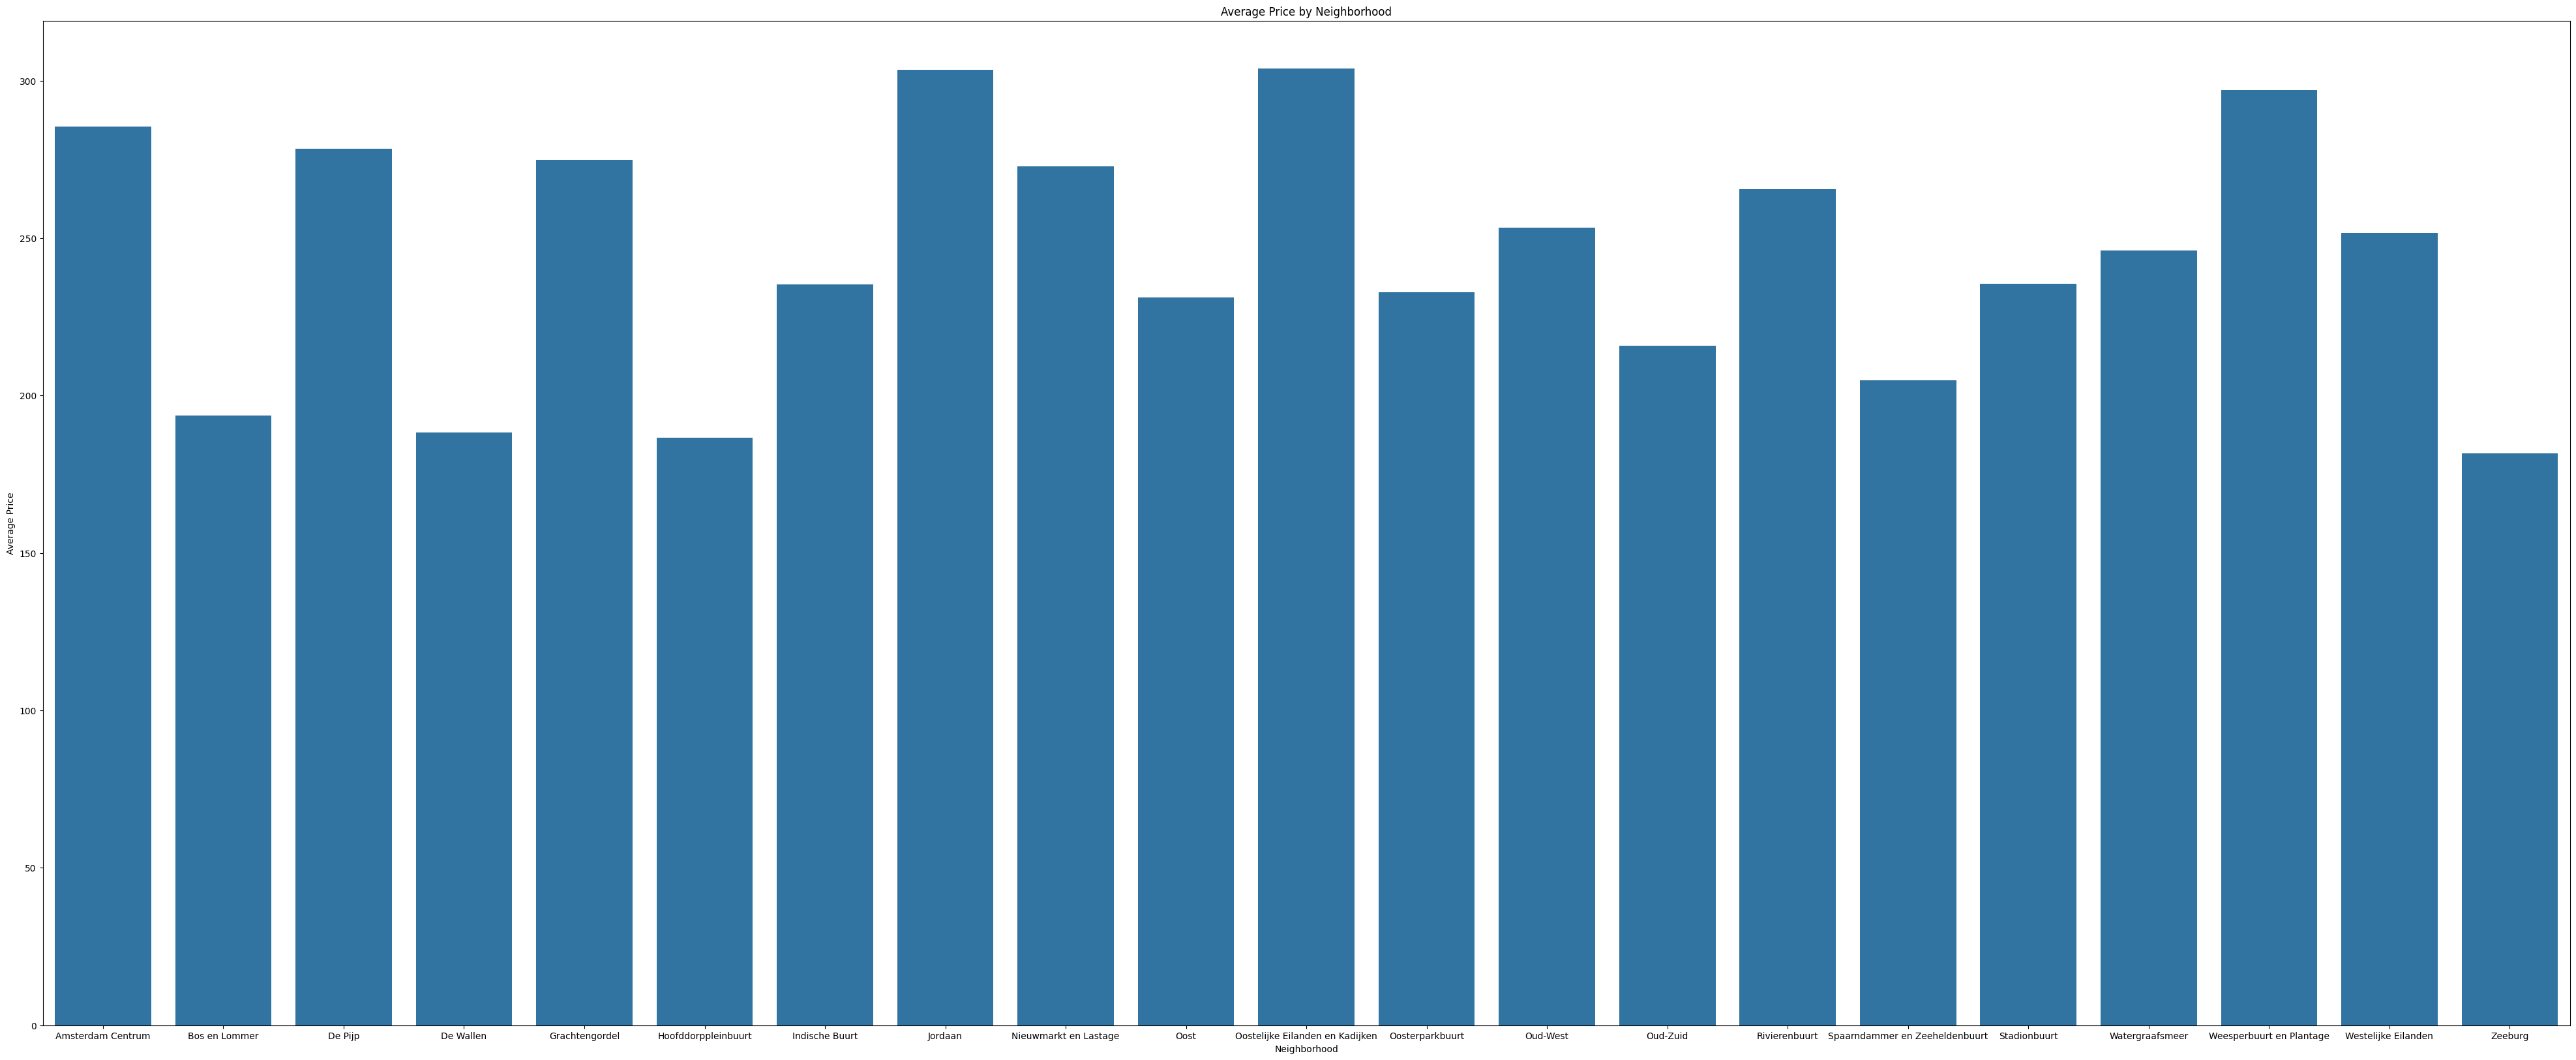

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by neighborhood and calculate the average price
neighbourhood_price = neighborhood_filtered_listing_amsterdam_price_df.groupby('host_neighbourhood')['price'].mean().reset_index()

# Plot the average price by neighborhood
plt.figure(figsize=(50, 20))
sns.barplot(x='host_neighbourhood', y='price', data=neighbourhood_price)
plt.title('Average Price by Neighborhood')
plt.ylabel('Average Price')
plt.xlabel('Neighborhood')
plt.show()

# Task 4 - Part B: Distribution of prices across different room types

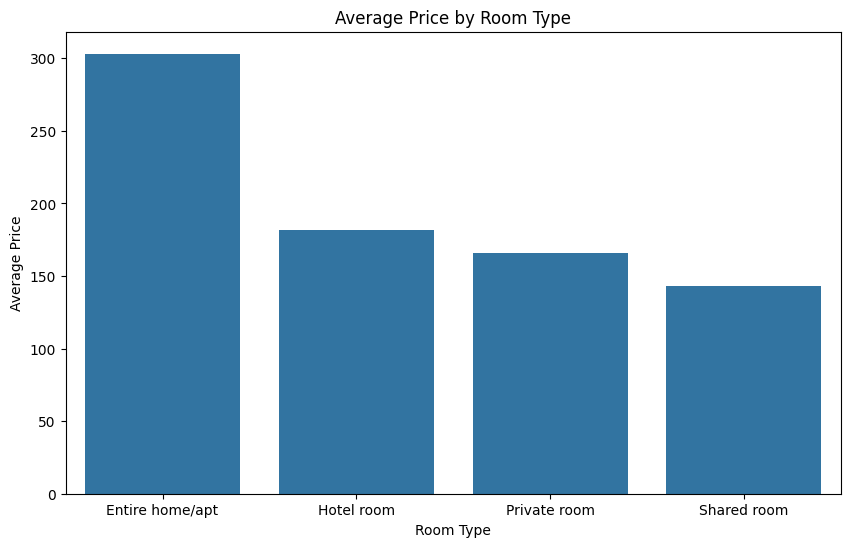

In [297]:
# Group by room type and calculate the average price
room_type_price = filtered_listing_amsterdam_price_df.groupby('room_type')['price'].mean().reset_index()

# Plot the average price by room type
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=room_type_price)
plt.title('Average Price by Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.show()

# Task 4 - Part C(i): Distribution of minimum stays across different neighbourhood

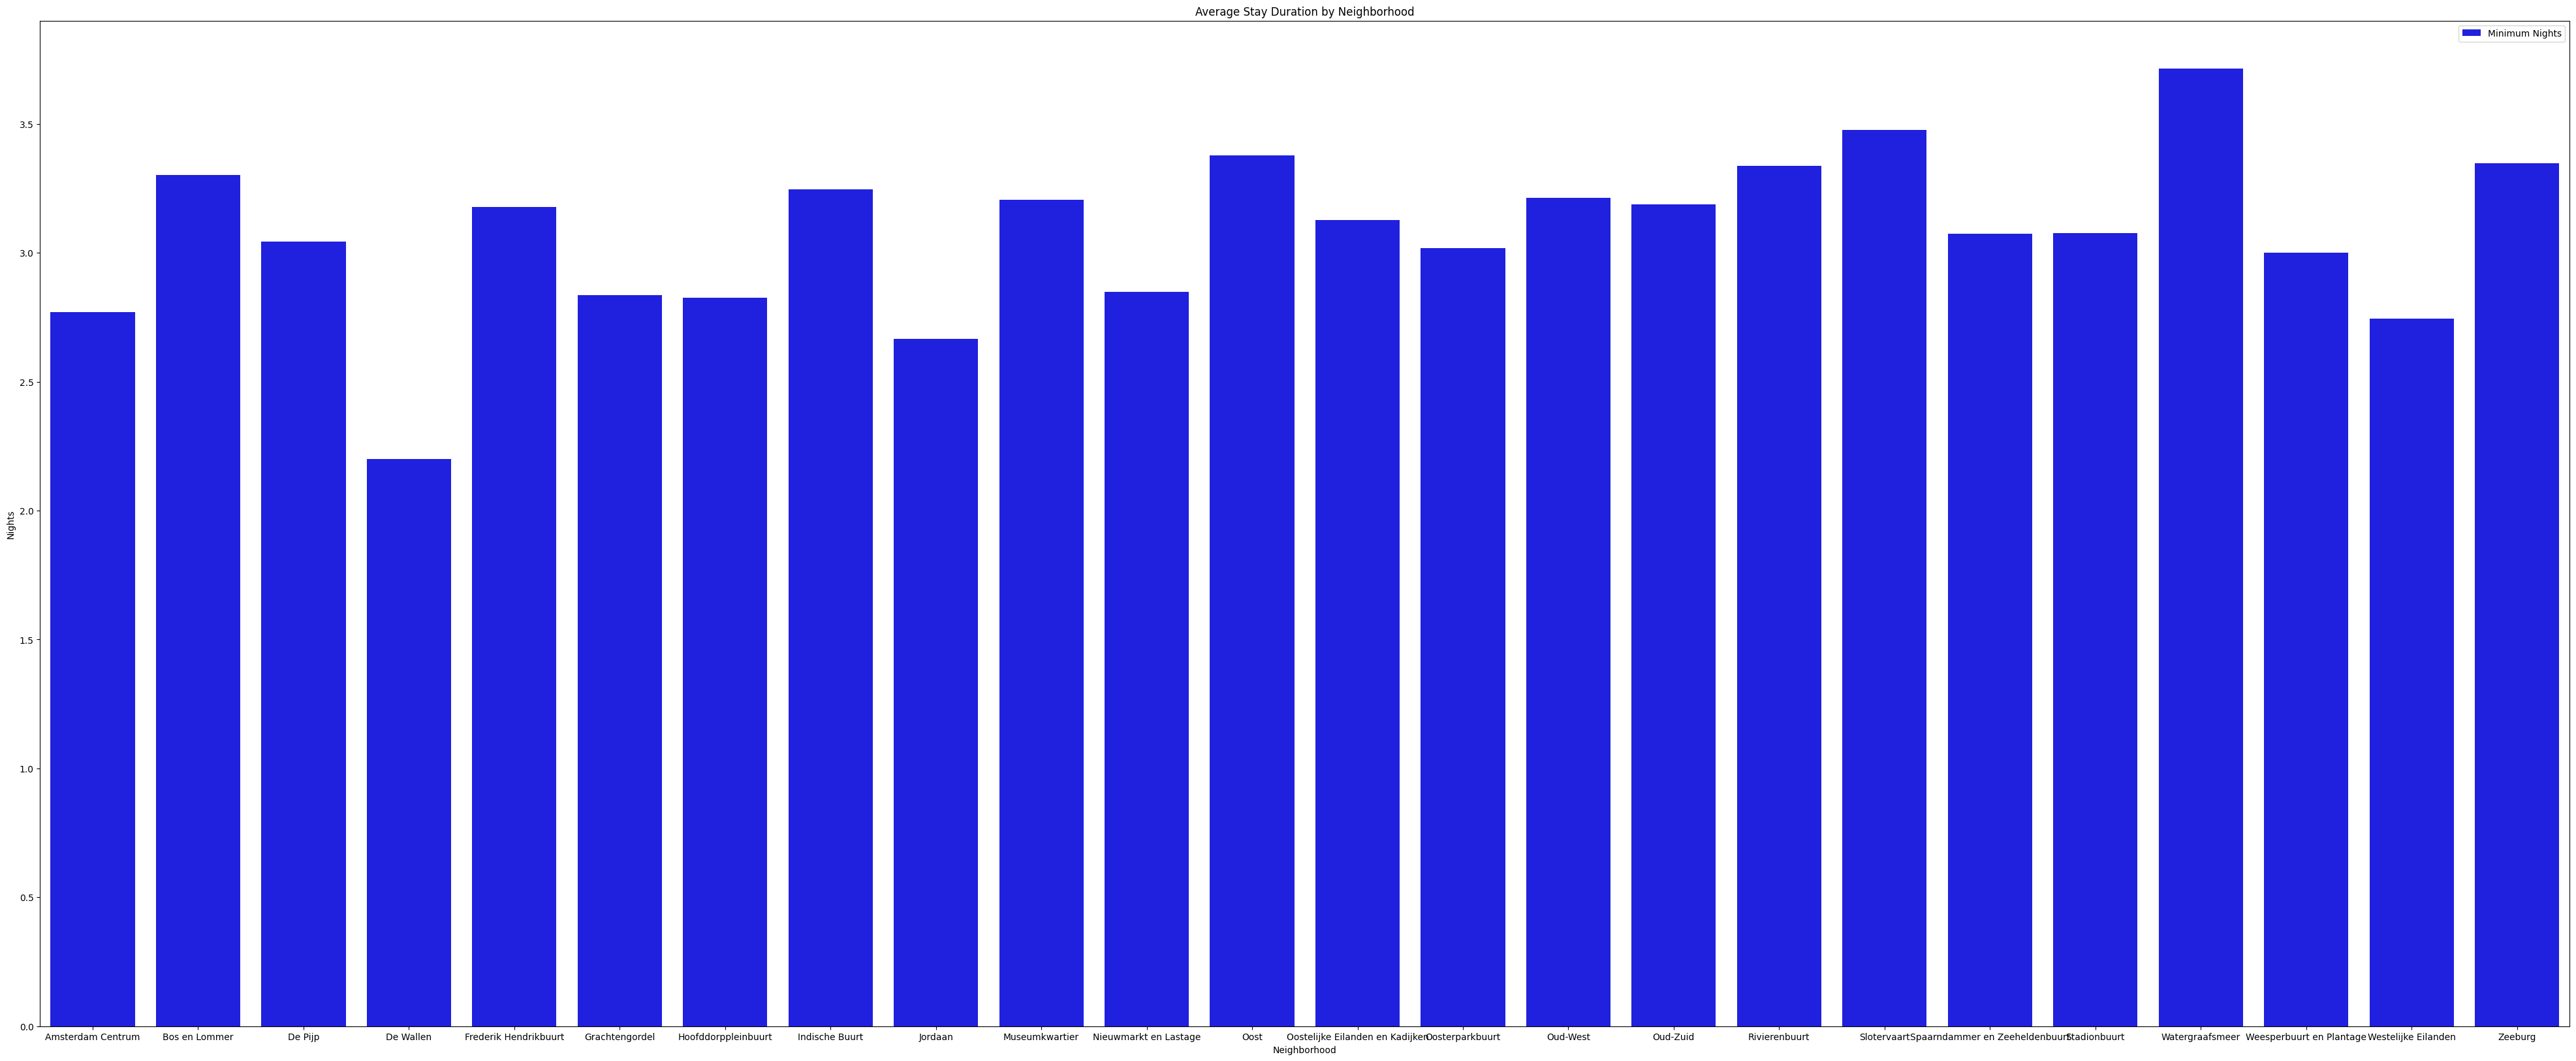

In [298]:
# Group by neighborhood and calculate the average minimum_nights and maximum_nights
neighbourhood_stay = neighborhood_filtered_listing_amsterdam_df.groupby('host_neighbourhood')[['minimum_nights']].mean().reset_index()

# Plot the average minimum and maximum nights by neighborhood
plt.figure(figsize=(50, 20))
sns.barplot(x='host_neighbourhood', y='minimum_nights', data=neighbourhood_stay, color='blue', label='Minimum Nights')
plt.title('Average Stay Duration by Neighborhood')
plt.ylabel('Nights')
plt.xlabel('Neighborhood')
plt.legend()
plt.show()

# Task 4 - Part C(ii): Distribution of maximum stays across different neighbourhood

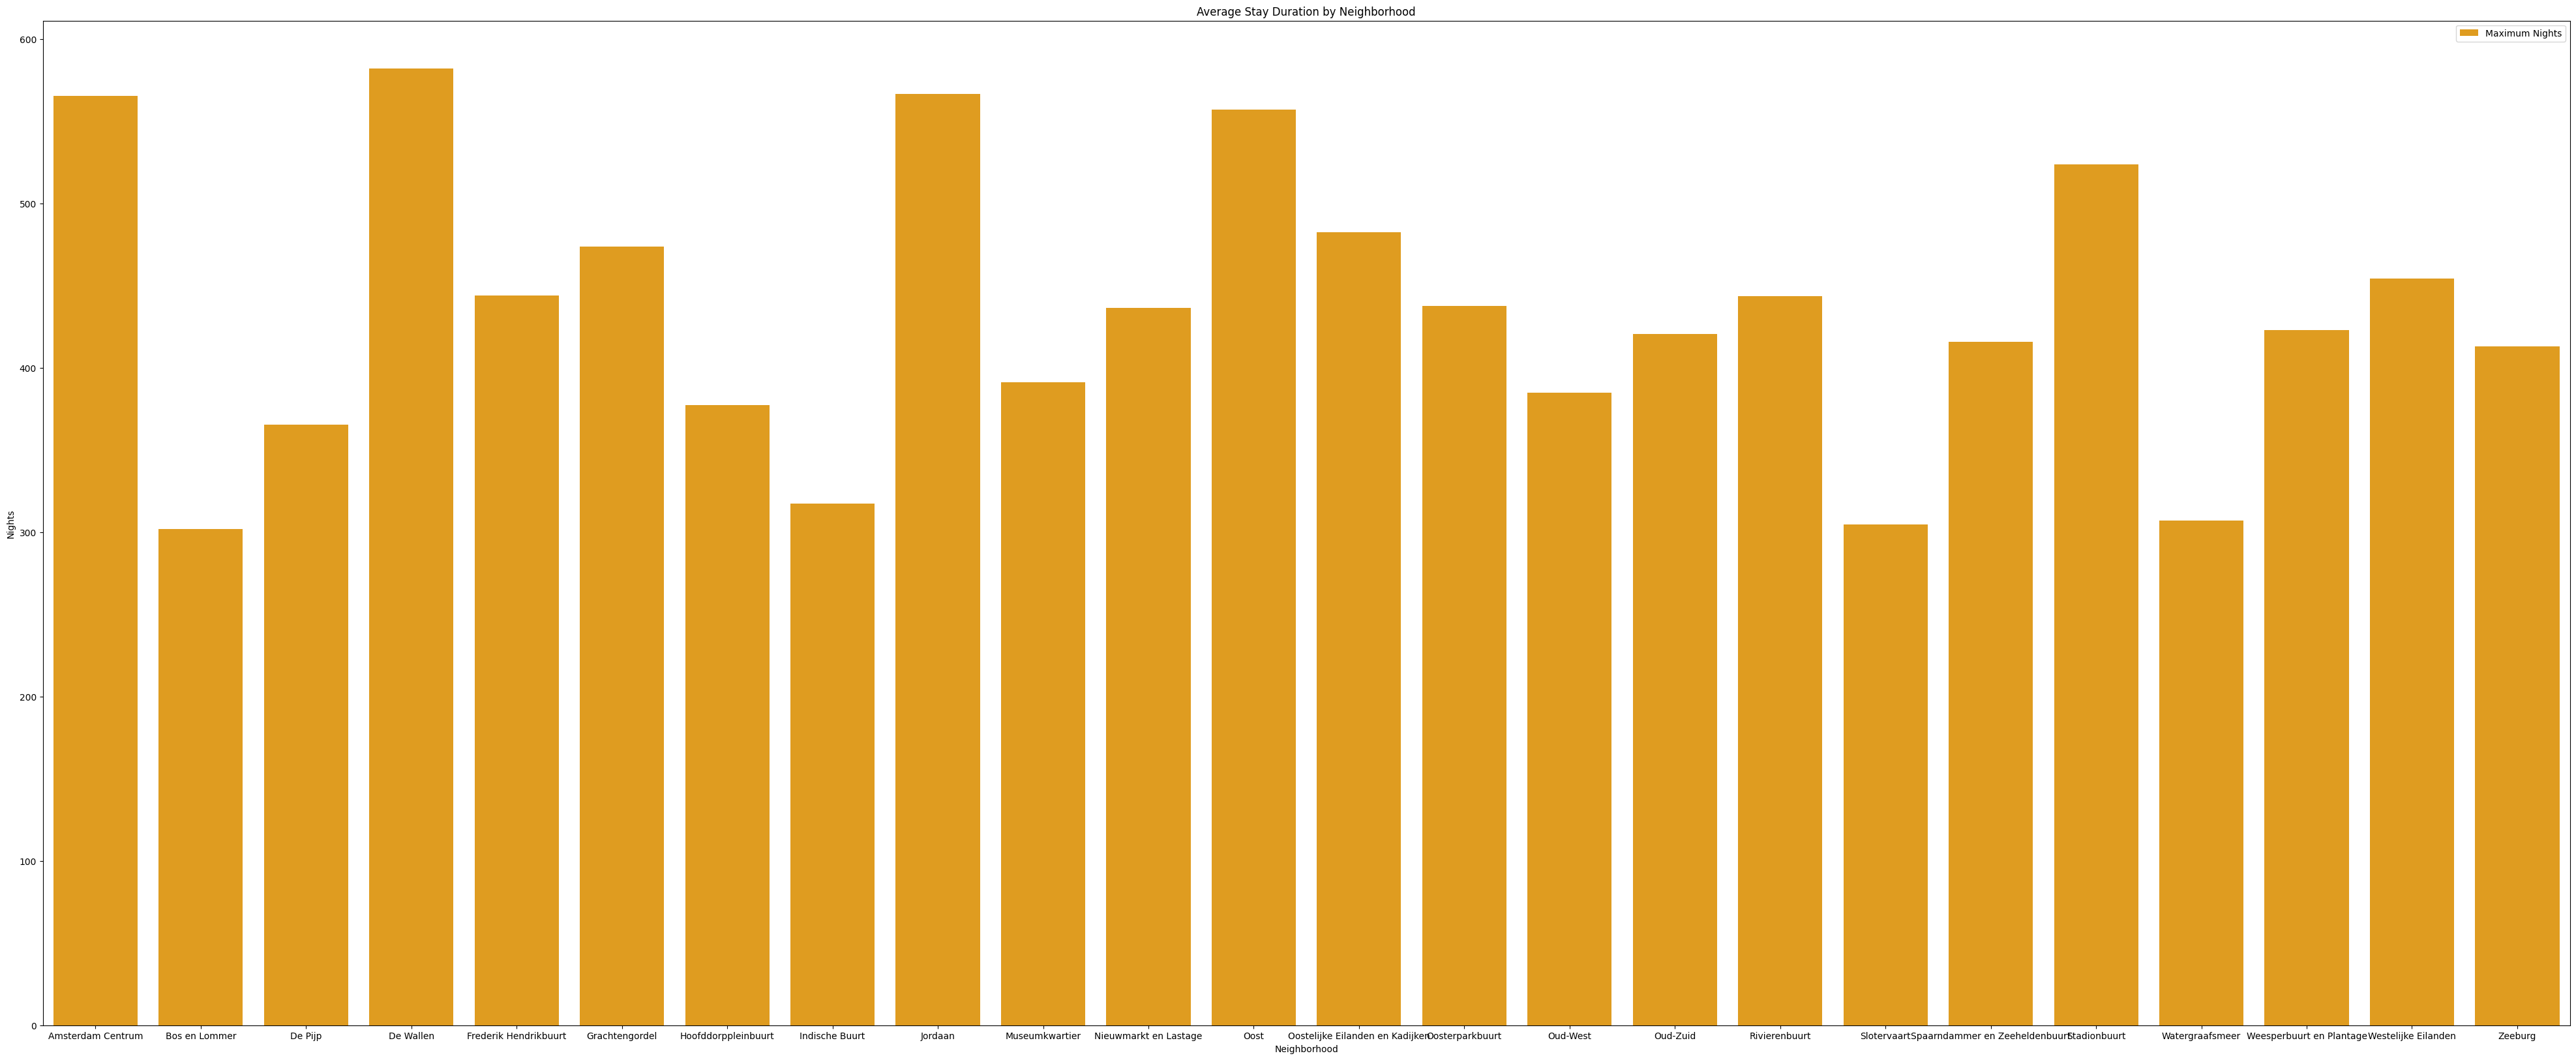

In [299]:
# Group by neighborhood and calculate the average minimum_nights and maximum_nights
neighbourhood_stay = neighborhood_filtered_listing_amsterdam_df.groupby('host_neighbourhood')[['maximum_nights']].mean().reset_index()

# Plot the average minimum and maximum nights by neighborhood
plt.figure(figsize=(50, 20))
sns.barplot(x='host_neighbourhood', y='maximum_nights', data=neighbourhood_stay, color='orange', label='Maximum Nights')
plt.title('Average Stay Duration by Neighborhood')
plt.ylabel('Nights')
plt.xlabel('Neighborhood')
plt.legend()
plt.show()

# Task 4 - Part C(iii): Distribution of minimum stays across different room types

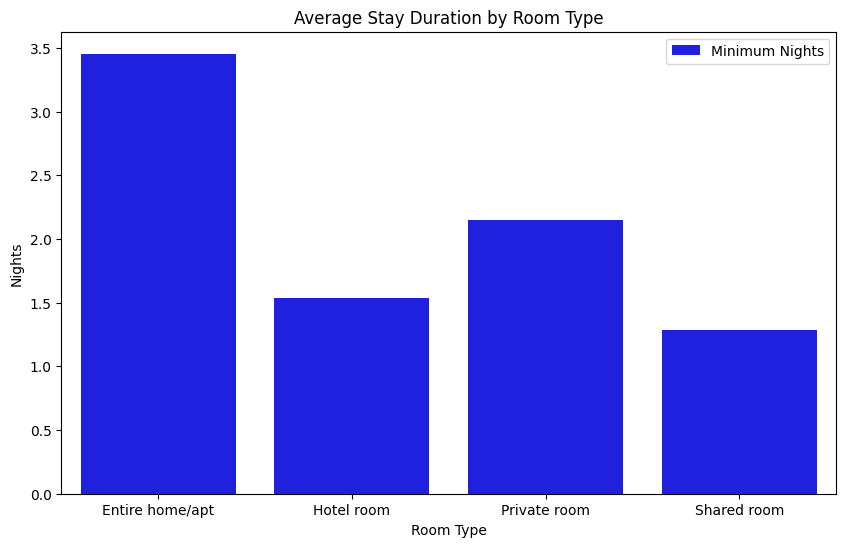

In [300]:
# Group by room type and calculate the average minimum_nights and maximum_nights
room_type_stay = neighborhood_filtered_listing_amsterdam_df.groupby('room_type')[['minimum_nights']].mean().reset_index()

# Plot the average minimum and maximum nights by room type
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='minimum_nights', data=room_type_stay, color='blue', label='Minimum Nights')
# sns.barplot(x='room_type', y='maximum_nights', data=room_type_stay, color='orange', label='Maximum Nights')
plt.title('Average Stay Duration by Room Type')
plt.ylabel('Nights')
plt.xlabel('Room Type')
plt.legend()
plt.show()

# Task 4 - Part C(iv): Distribution of maximum stays across different room types

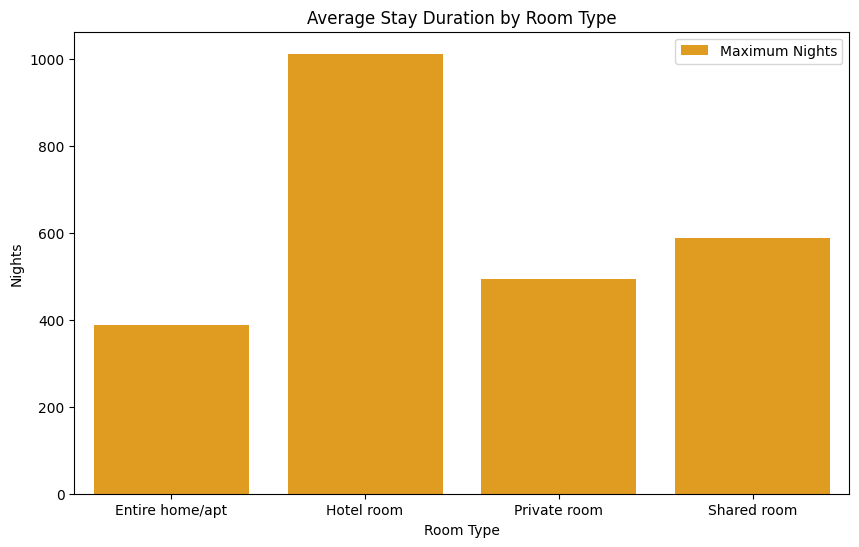

In [301]:
# Group by room type and calculate the average minimum_nights and maximum_nights
room_type_stay = neighborhood_filtered_listing_amsterdam_df.groupby('room_type')[['maximum_nights']].mean().reset_index()

# Plot the average minimum and maximum nights by room type
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='maximum_nights', data=room_type_stay, color='orange', label='Maximum Nights')
plt.title('Average Stay Duration by Room Type')
plt.ylabel('Nights')
plt.xlabel('Room Type')
plt.legend()
plt.show()

# Task 4 - Part D(i): Box plots to show price distribution across different neighbourhood

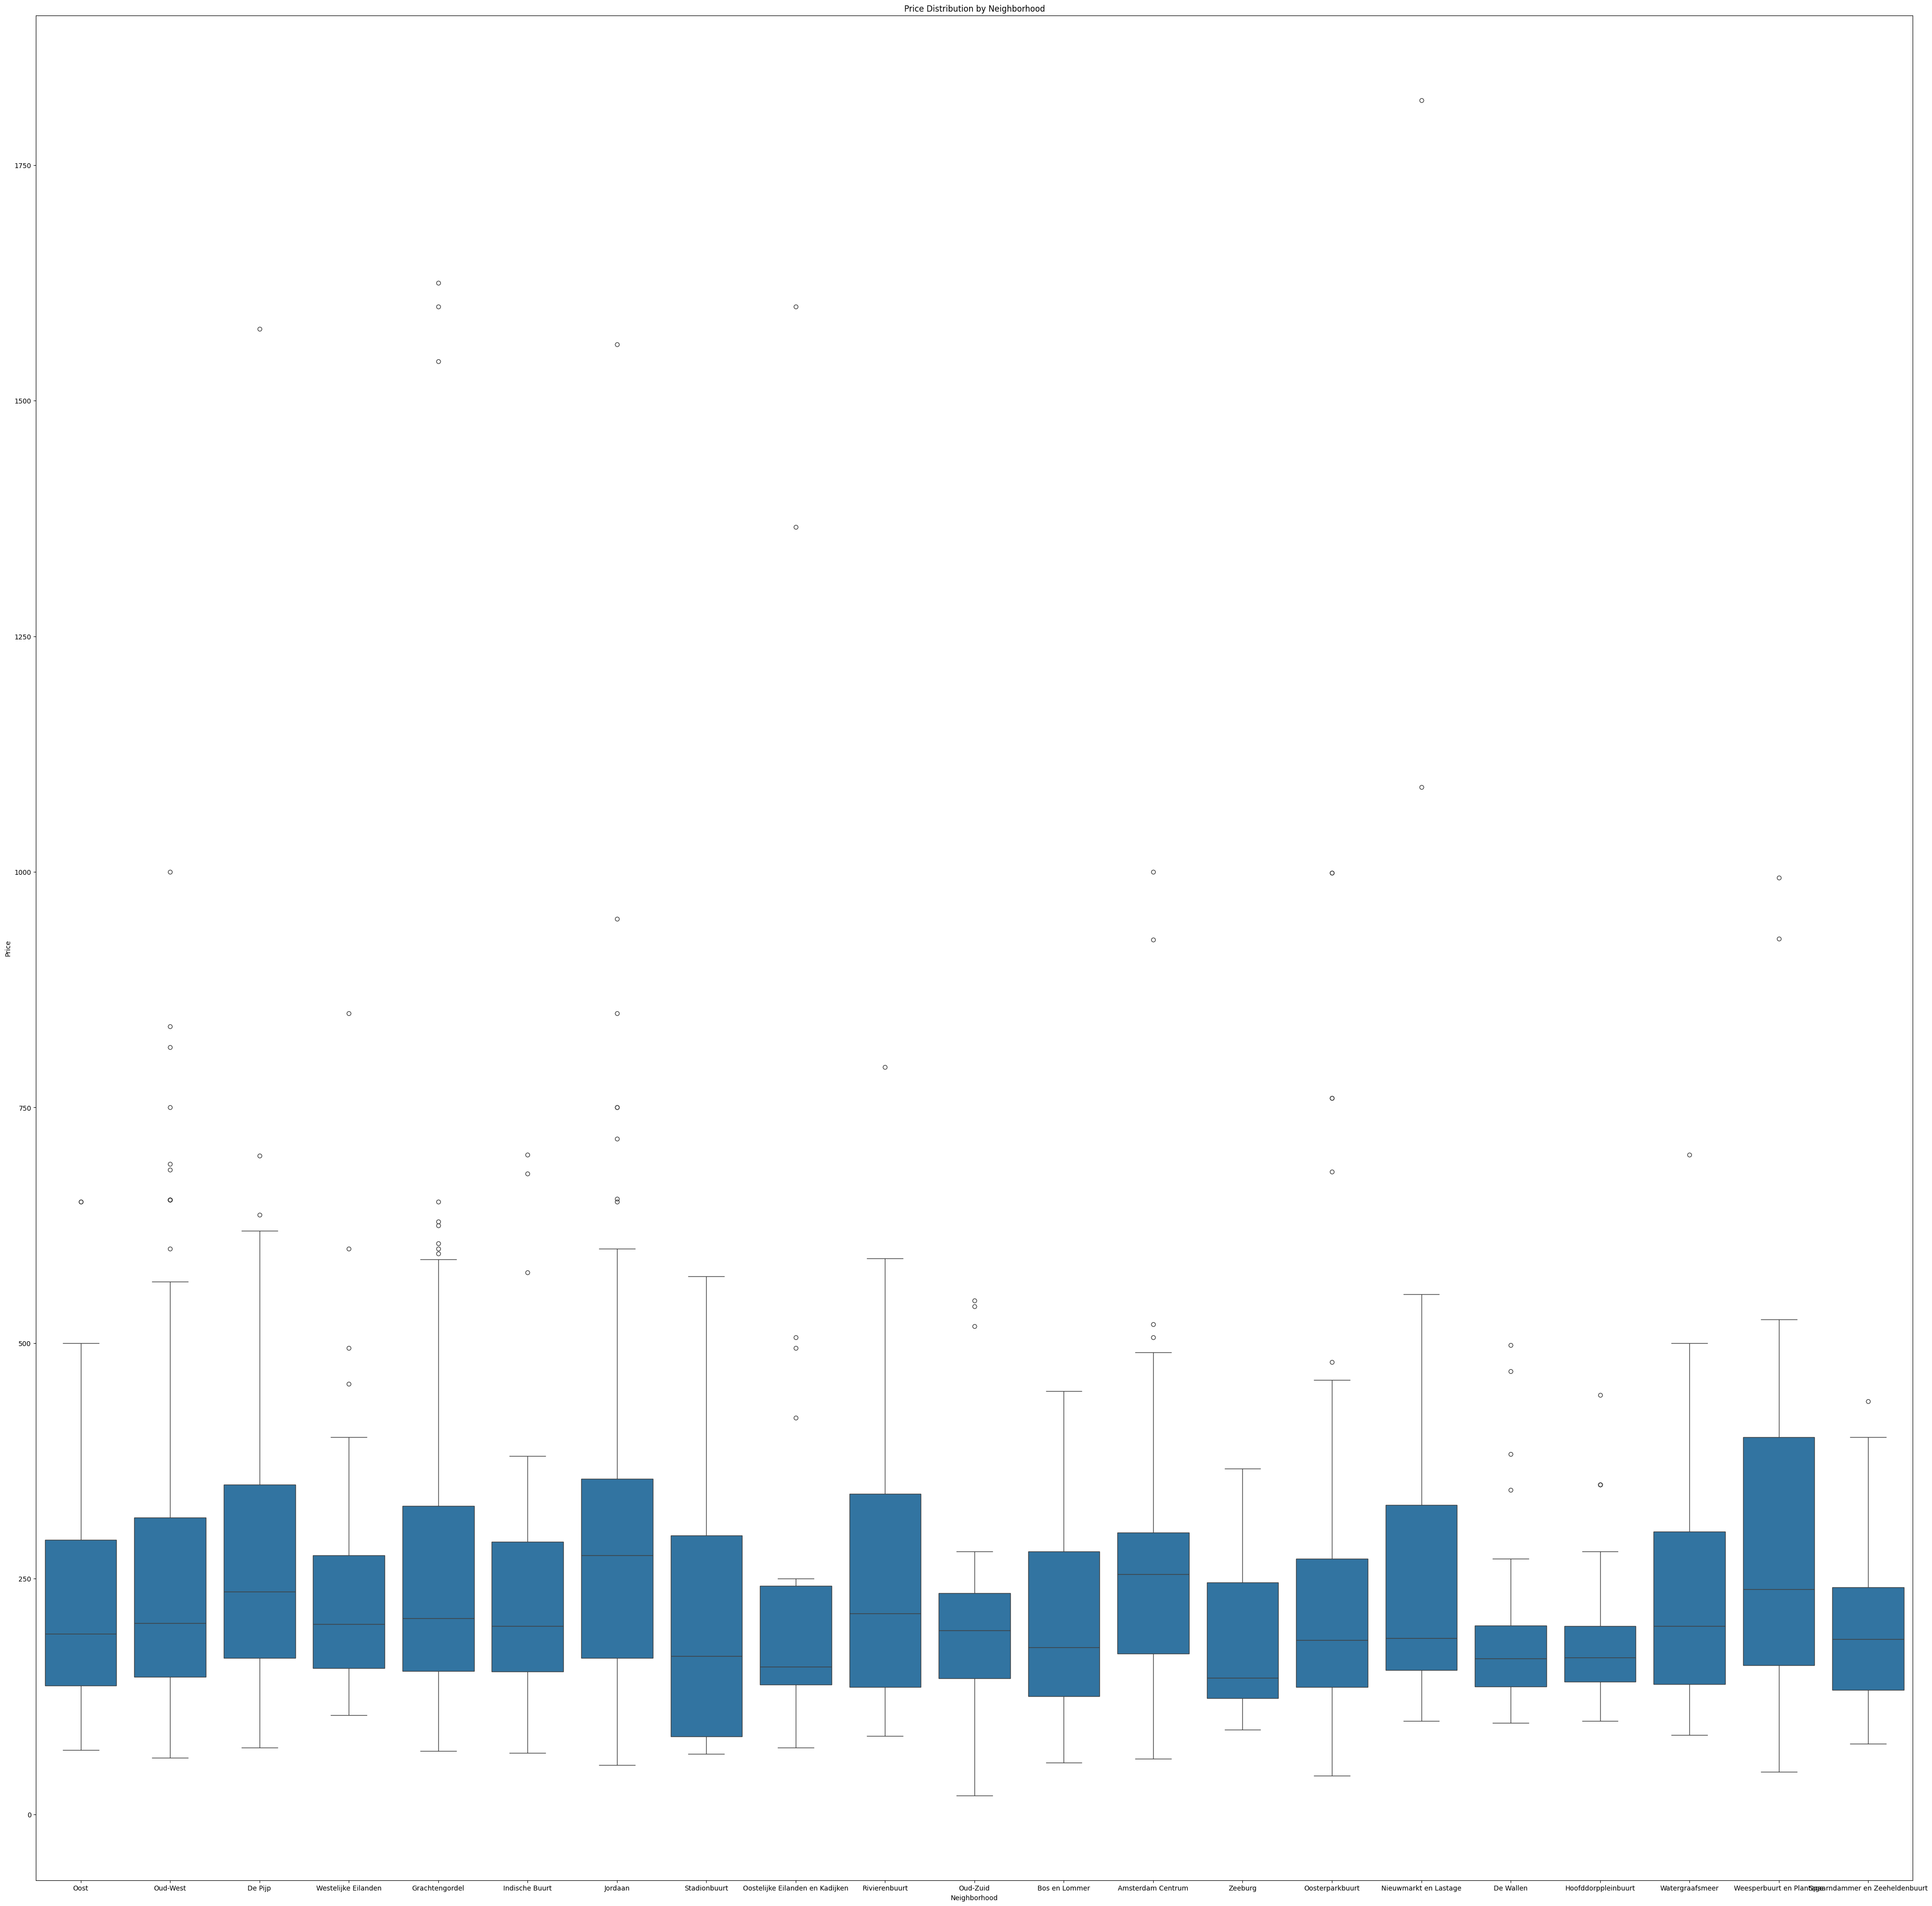

In [302]:
# Boxplot to show price distribution by neighborhood
plt.figure(figsize=(50, 50))
sns.boxplot(x='host_neighbourhood', y='price', data=neighborhood_filtered_listing_amsterdam_price_df)
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

# Task 4 - Part D(ii): Box plots to show price distribution across different room types

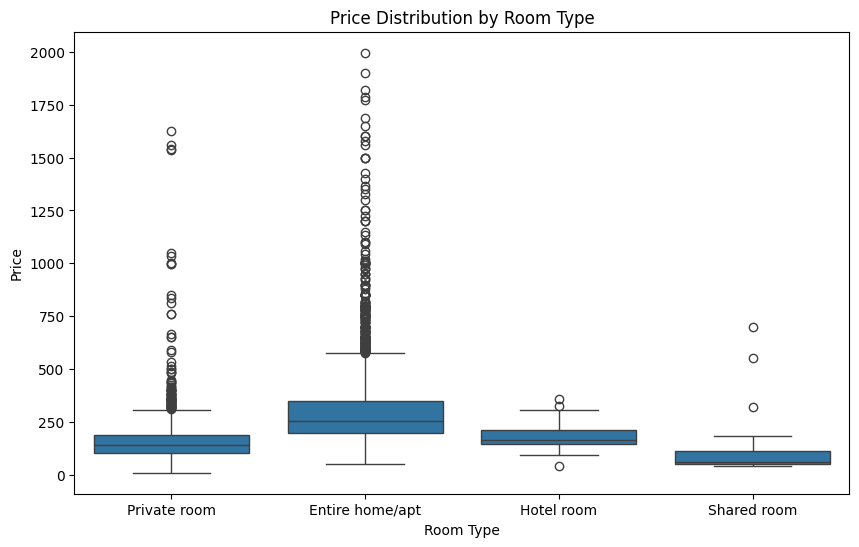

In [303]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=filtered_listing_amsterdam_price_df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

# Task 5 - Comparing review score ratings across different neighbourhood and analyzing the trend

In [304]:
print(listing_amsterdam_review_score_df['review_scores_rating'].head())

0    4.84
1    4.71
2    5.00
3    4.61
4    4.97
Name: review_scores_rating, dtype: float64


In [305]:
print(listing_amsterdam_review_score_df['host_neighbourhood'].info())
print(listing_amsterdam_review_score_df['host_neighbourhood'].value_counts()) 

<class 'pandas.core.series.Series'>
RangeIndex: 8632 entries, 0 to 8631
Series name: host_neighbourhood
Non-Null Count  Dtype 
--------------  ----- 
2810 non-null   object
dtypes: object(1)
memory usage: 67.6+ KB
None
host_neighbourhood
Oud-West                        532
Grachtengordel                  229
De Pijp                         206
Jordaan                         167
Oosterparkbuurt                 140
                               ... 
Niagara                           1
Stockwell                         1
Cannaregio                        1
Józsefváros - District VIII.      1
La Combe                          1
Name: count, Length: 66, dtype: int64


In [306]:
neighborhood_filtered_listing_amsterdam_review_score_df = listing_amsterdam_review_score_df.dropna(subset=['host_neighbourhood'])
print(neighborhood_filtered_listing_amsterdam_review_score_df.shape)

(2810, 61)


Top 5 neighborhoods with highest average ratings:
   host_neighbourhood  review_scores_rating
17          Hampstead                   5.0
38  Old North Boulder                   5.0
37           Norrmalm                   5.0
29        Merkaz HaIr                   5.0
10     Centro Storico                   5.0

Bottom 5 neighborhoods with lowest average ratings:
      host_neighbourhood  review_scores_rating
0               Almarjão              4.745000
51  Slotermeer-Noordoost              4.706154
58   Tuindorp Nieuwendam              4.644286
30              Mountjoy              4.250000
9             Cannaregio              4.000000


/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/102176117.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_scores_rating', y='host_neighbourhood', data=neighborhood_avg_ratings, palette='coolwarm')


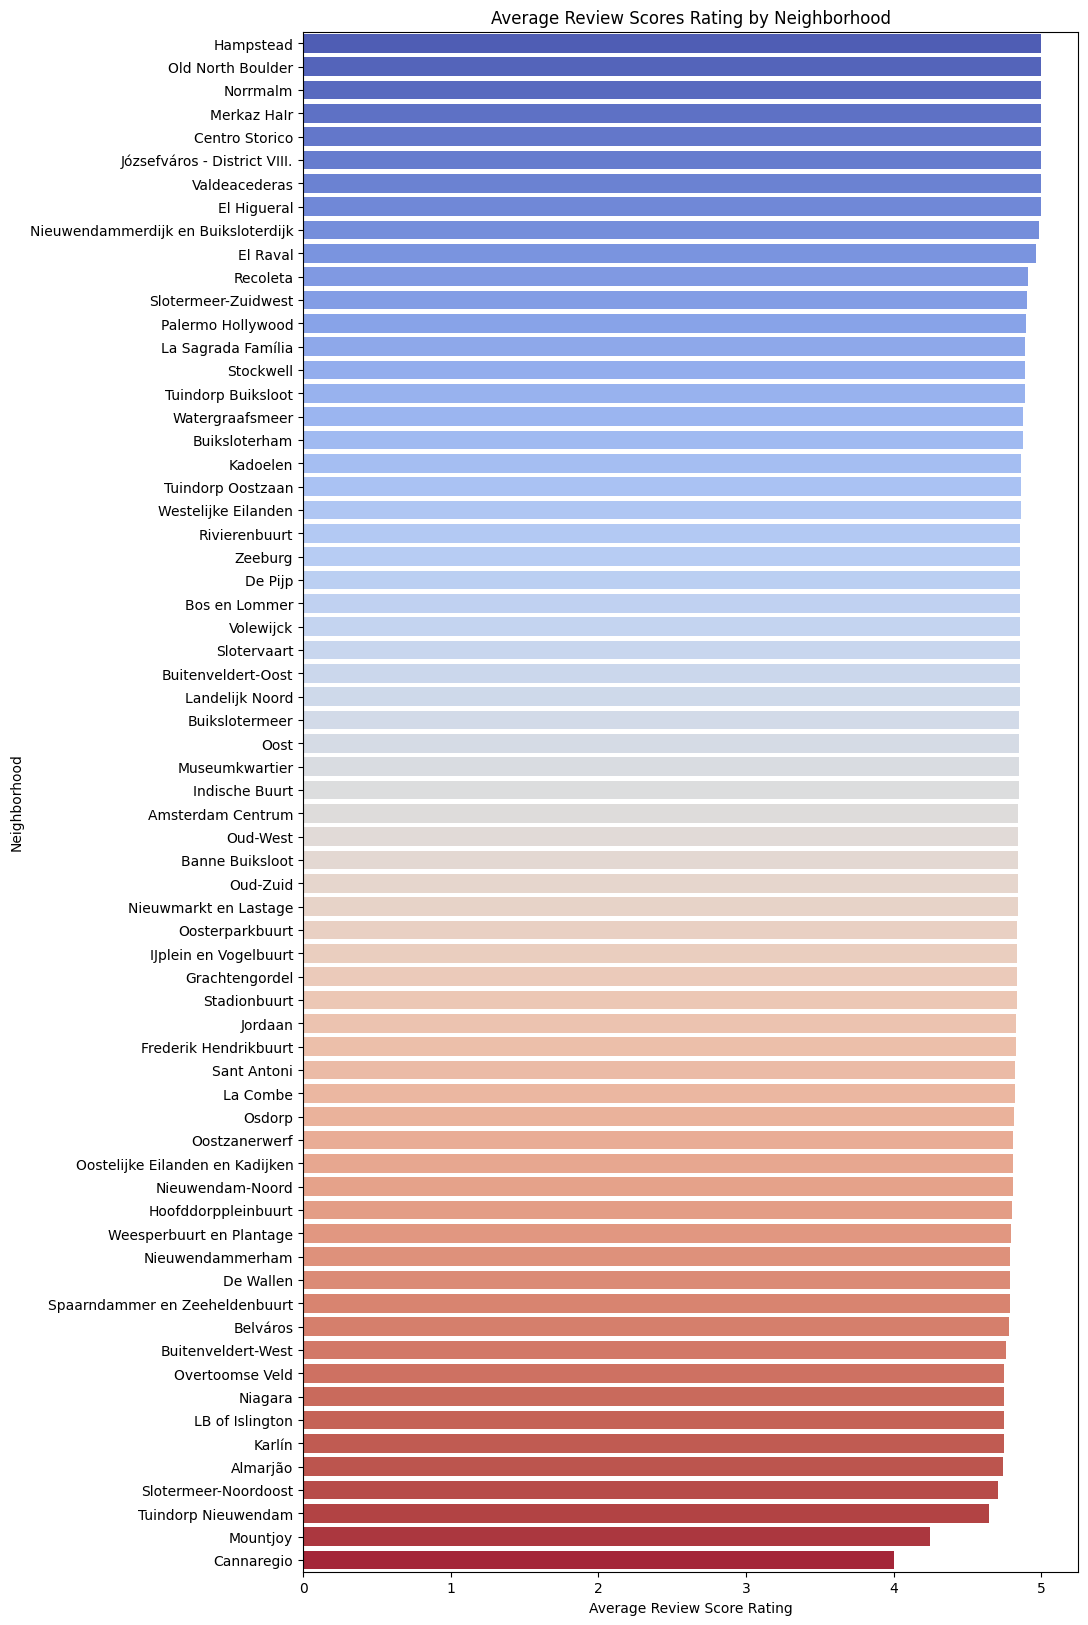

ANOVA test result: F-statistic = 2.604, p-value = 0.000
The differences in ratings across neighborhoods are statistically significant (p < 0.05).


/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11316/102176117.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_scores_rating', y='host_neighbourhood', data=neighborhood_filtered_listing_amsterdam_review_score_df, palette='Set2')


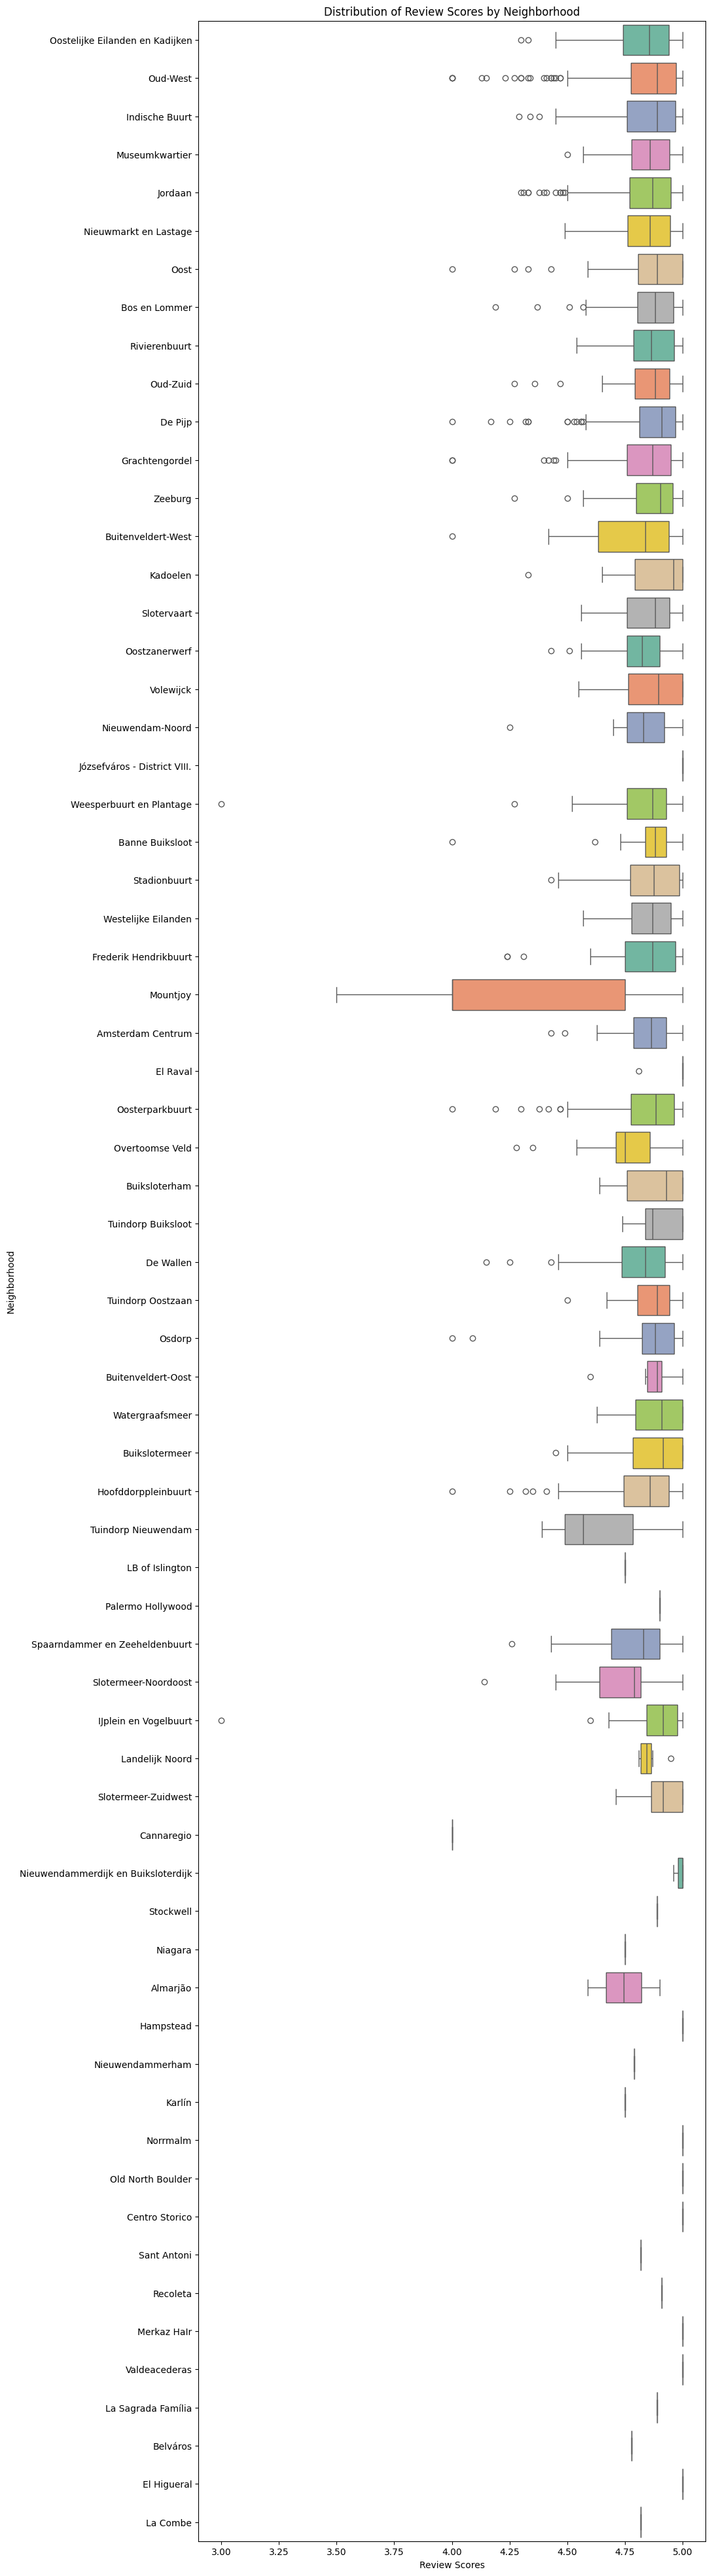

In [307]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Group by neighborhood and calculate average review_scores_rating
neighborhood_avg_ratings = neighborhood_filtered_listing_amsterdam_review_score_df.groupby('host_neighbourhood')['review_scores_rating'].mean().reset_index()

# Sort neighborhoods by average rating
neighborhood_avg_ratings = neighborhood_avg_ratings.sort_values(by='review_scores_rating', ascending=False)

# Display top neighborhoods with highest ratings
print("Top 5 neighborhoods with highest average ratings:")
print(neighborhood_avg_ratings.head())

# Display bottom neighborhoods with lowest ratings
print("\nBottom 5 neighborhoods with lowest average ratings:")
print(neighborhood_avg_ratings.tail())

# Visualization of the average review_scores_rating across neighborhoods
plt.figure(figsize=(10, 20))
sns.barplot(x='review_scores_rating', y='host_neighbourhood', data=neighborhood_avg_ratings, palette='coolwarm')
plt.title('Average Review Scores Rating by Neighborhood')
plt.xlabel('Average Review Score Rating')
plt.ylabel('Neighborhood')
plt.show()

# Perform ANOVA to check if differences between neighborhoods are statistically significant
anova_result = stats.f_oneway(
    *[group['review_scores_rating'].values for name, group in neighborhood_filtered_listing_amsterdam_review_score_df.groupby('host_neighbourhood')]
)

print(f"ANOVA test result: F-statistic = {anova_result.statistic:.3f}, p-value = {anova_result.pvalue:.3f}")

if anova_result.pvalue < 0.05:
    print("The differences in ratings across neighborhoods are statistically significant (p < 0.05).")
else:
    print("The differences in ratings across neighborhoods are not statistically significant (p >= 0.05).")

# Step 4: Boxplot for Distribution of Review Scores across Neighborhoods
plt.figure(figsize=(10, 50))
sns.boxplot(x='review_scores_rating', y='host_neighbourhood', data=neighborhood_filtered_listing_amsterdam_review_score_df, palette='Set2')
plt.title('Distribution of Review Scores by Neighborhood')
plt.xlabel('Review Scores')
plt.ylabel('Neighborhood')
plt.show()


# Task 7 - Analyzing the impact of the comment length and sentiment of the user

# Counting the length of the comments and storing it in a new column

In [308]:
review_amsterdam_df['comment_length'] = review_amsterdam_df['comments'].str.len()

columns = ['comments','comment_length']

print(review_amsterdam_df.info())

# Display the DataFrame with the new column
print(review_amsterdam_df[columns])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482042 entries, 0 to 482041
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      482041 non-null  object 
 1   id              453381 non-null  float64
 2   date            440807 non-null  object 
 3   comments        439671 non-null  object 
 4   city_id         428233 non-null  float64
 5   comment_length  439671 non-null  float64
dtypes: float64(3), object(3)
memory usage: 22.1+ MB
None
                                                 comments  comment_length
0       daniel is really cool the place was nice and c...           243.0
1       daniel is the most amazing host his place is e...           319.0
2       we had such a great time in amsterdam daniel i...           354.0
3                                                     NaN             NaN
4       very professional operation room is very clean...           199.0
...                 

# Using text blob to identify the sentiments of the users

In [309]:
from textblob import TextBlob

def analyze_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to the 'reviews' column
review_amsterdam_df[['sentiment_polarity', 'sentiment_subjectivity']] = review_amsterdam_df['comments'].astype(str).apply(analyze_sentiment).apply(pd.Series)

In [311]:
columns = ['comments','comment_length','sentiment_polarity', 'sentiment_subjectivity']
print(review_amsterdam_df[columns])

                                                 comments  comment_length  \
0       daniel is really cool the place was nice and c...           243.0   
1       daniel is the most amazing host his place is e...           319.0   
2       we had such a great time in amsterdam daniel i...           354.0   
3                                                     NaN             NaN   
4       very professional operation room is very clean...           199.0   
...                                                   ...             ...   
482037  had a really nice stay in this apartment it wa...           150.0   
482038  firstly i would like to mention that sophie we...           630.0   
482039  this stay did not disappoint brwe couldn’t hav...           387.0   
482040  can’t say better things about this home and th...           228.0   
482041  niek的公寓位置很好，交通很便利，房间也很好，我们住得很舒服，我们喜欢小露台。niek本人...           127.0   

        sentiment_polarity  sentiment_subjectivity  
0                 0.13

# Analyzing the correlation between the comment length and the sentiment score obtained

                        comment_length  sentiment_polarity  \
comment_length                1.000000           -0.171114   
sentiment_polarity           -0.171114            1.000000   
sentiment_subjectivity       -0.004541            0.824506   

                        sentiment_subjectivity  
comment_length                       -0.004541  
sentiment_polarity                    0.824506  
sentiment_subjectivity                1.000000  


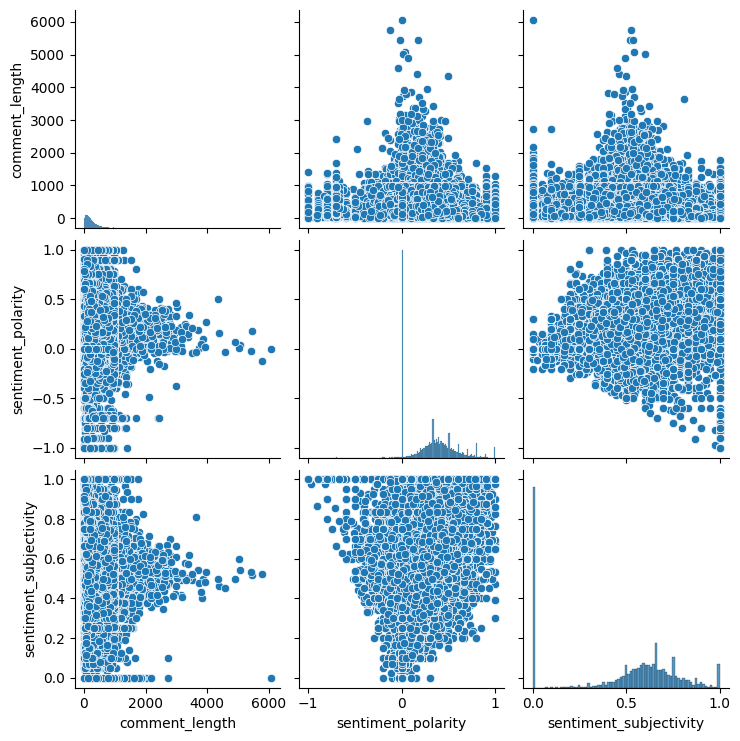

In [312]:
review_features = ['comment_length','sentiment_polarity','sentiment_subjectivity']

review_corr_matrix_updated = review_amsterdam_df[review_features].corr()

# Print the correlation matrix
print(review_corr_matrix_updated)

sns.pairplot(review_amsterdam_df[review_features])

# Display the plots
plt.show()

# Visualizing the correlation using the heatmap

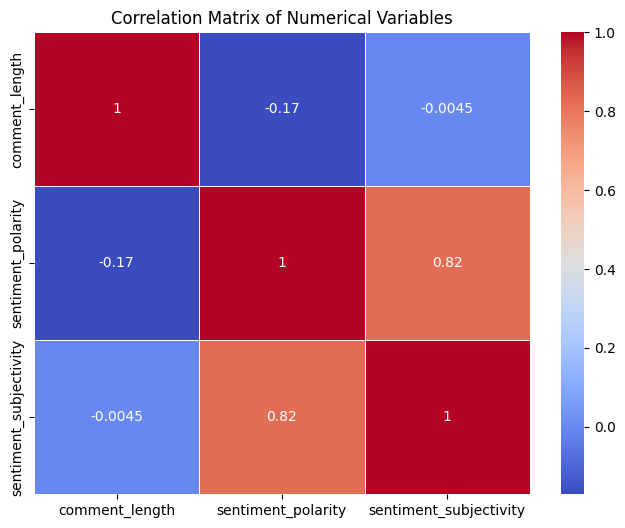

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(review_corr_matrix_updated, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Using a sentiment analysis model to calculate the sentiment score of the comments

In [314]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment(review):
    return sia.polarity_scores(review)

# Apply the function to the 'reviews' column
review_amsterdam_df['sentiment_scores'] = review_amsterdam_df['comments'].astype(str).apply(get_sentiment)

# Expand the sentiment scores into separate columns
review_amsterdam_df = review_amsterdam_df.join(pd.json_normalize(review_amsterdam_df['sentiment_scores']))

# Display the DataFrame with the new sentiment columns
print(review_amsterdam_df)

                      listing_id            id        date  \
0                           2818  1.191000e+03  2009-03-30   
1                           2818  1.771000e+03  2009-04-24   
2                           2818  1.989000e+03  2009-05-03   
3       brtotally recommendable   1.000000e+00         NaN   
4                           2818  2.797000e+03  2009-05-18   
...                          ...           ...         ...   
482037       1220731757489855109  1.225961e+18  2024-08-18   
482038       1221126358102458113  1.232468e+18  2024-08-27   
482039       1221572481595092953  1.231032e+18  2024-08-25   
482040       1221580344177848903  1.233987e+18  2024-08-29   
482041       1222452846089772090  1.236913e+18  2024-09-02   

                                                 comments  city_id  \
0       daniel is really cool the place was nice and c...      1.0   
1       daniel is the most amazing host his place is e...      1.0   
2       we had such a great time in amsterdam

In [316]:
print(review_amsterdam_df['sentiment_scores'])

0         {'neg': 0.047, 'neu': 0.701, 'pos': 0.251, 'co...
1         {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...
2         {'neg': 0.028, 'neu': 0.675, 'pos': 0.297, 'co...
3         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4         {'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...
                                ...                        
482037    {'neg': 0.061, 'neu': 0.608, 'pos': 0.331, 'co...
482038    {'neg': 0.018, 'neu': 0.714, 'pos': 0.268, 'co...
482039    {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...
482040    {'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...
482041    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: sentiment_scores, Length: 482042, dtype: object


                comment_length  compound
comment_length        1.000000  0.101891
compound              0.101891  1.000000


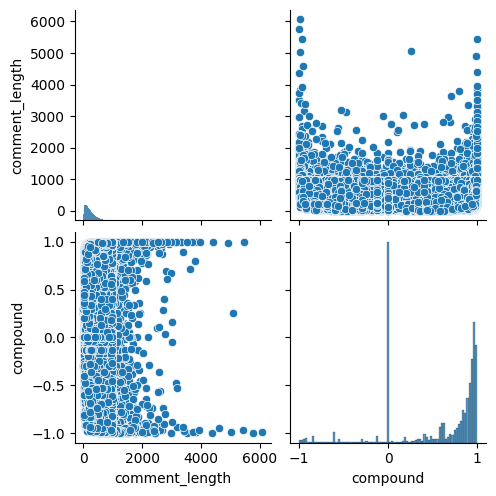

In [317]:
review_features = ['comment_length','compound']

review_corr_matrix_updated = review_amsterdam_df[review_features].corr()

# Print the correlation matrix
print(review_corr_matrix_updated)

sns.pairplot(review_amsterdam_df[review_features])

# Display the plots
plt.show()

# Visualizing the correlation results obtained on a heatmap

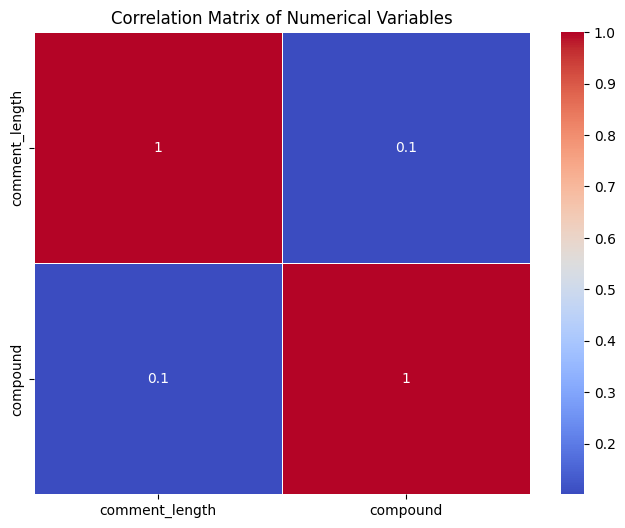

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(review_corr_matrix_updated, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Task 8 - Analyzing the impact of a list of words on the sentiment score

      clean  comfortable     noisy  spacious     great
0  0.498749     0.524690  0.562822   0.55117  0.427046
1  0.902932     0.926292  0.763507   0.90656  0.898702


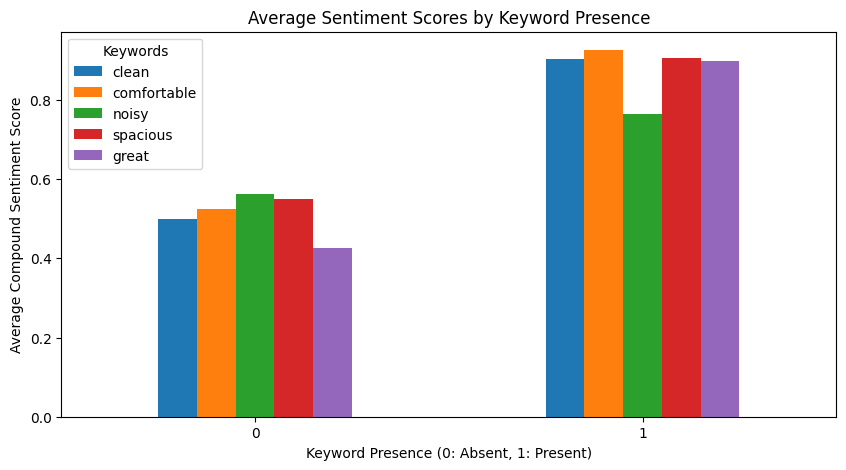

In [319]:
keywords = ['clean', 'comfortable', 'noisy','spacious','great']

# Create new features based on the occurrence of keywords
for keyword in keywords:
    review_amsterdam_df[f'contains_{keyword}'] = review_amsterdam_df['comments'].str.contains(keyword, case=False, na=False).astype(int)

# Analyze average sentiment scores based on keyword presence
keyword_analysis = {}
for keyword in keywords:
    keyword_analysis[keyword] = review_amsterdam_df.groupby(f'contains_{keyword}')['compound'].mean()

# Convert to DataFrame for better visualization
keyword_analysis_df = pd.DataFrame(keyword_analysis)

# Display average sentiment scores
print(keyword_analysis_df)

# Visualization (optional)
import matplotlib.pyplot as plt

keyword_analysis_df.plot(kind='bar', figsize=(10, 5))
plt.title('Average Sentiment Scores by Keyword Presence')
plt.xlabel('Keyword Presence (0: Absent, 1: Present)')
plt.ylabel('Average Compound Sentiment Score')
plt.xticks(rotation=0)
plt.legend(title='Keywords')
plt.show()